In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
import random
import math
import time
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
import datetime
import operator 
plt.style.use('fivethirtyeight')
%matplotlib inline 

In [3]:
confirmed_cases = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')

In [4]:
confirmed_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,11/13/20,11/14/20,11/15/20,11/16/20,11/17/20,11/18/20,11/19/20,11/20/20,11/21/20,11/22/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,42969,43035,43240,43403,43628,43851,44228,44443,44503,44706
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,26701,27233,27830,28432,29126,29837,30623,31459,32196,32761
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,65975,66819,67679,68589,69591,70629,71652,72755,73774,74862
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,5725,5725,5872,5914,5951,6018,6066,6142,6207,6256
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,13228,13374,13451,13615,13818,13922,14134,14267,14413,14493


In [5]:
deaths_reported = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')

In [6]:
deaths_reported.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,11/13/20,11/14/20,11/15/20,11/16/20,11/17/20,11/18/20,11/19/20,11/20/20,11/21/20,11/22/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,1595,1605,1617,1626,1638,1645,1650,1661,1675,1687
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,605,612,623,631,637,646,657,672,685,699
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,2124,2139,2154,2168,2186,2206,2224,2236,2255,2272
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,75,75,76,76,76,76,76,76,76,76
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,317,322,322,324,328,332,333,334,336,337


In [7]:
recovered_cases = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

In [8]:
recovered_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,11/13/20,11/14/20,11/15/20,11/16/20,11/17/20,11/18/20,11/19/20,11/20/20,11/21/20,11/22/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,35036,35067,35092,35137,35160,35295,35350,35370,35422,35934
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,12667,12767,12889,13453,13804,14216,14565,15055,15469,15842
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,43779,44199,44633,45148,45148,46326,46962,47581,48183,48794
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,4675,4675,4747,4830,4965,5055,5127,5239,5290,5358
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,6326,6345,6444,6523,6582,6623,7062,7117,7273,7346


In [9]:
latest_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/07-15-2020.csv')

In [10]:
latest_data.head()

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incidence_Rate,Case-Fatality_Ratio
0,45001.0,Abbeville,South Carolina,US,2020-07-16 04:44:59,34.223334,-82.461707,165,1,0,164.0,"Abbeville, South Carolina, US",672.728014,0.606061
1,22001.0,Acadia,Louisiana,US,2020-07-16 04:44:59,30.295065,-92.414197,1510,46,0,1464.0,"Acadia, Louisiana, US",2433.717463,3.046358
2,51001.0,Accomack,Virginia,US,2020-07-16 04:44:59,37.767072,-75.632346,1045,14,0,1031.0,"Accomack, Virginia, US",3233.692289,1.339713
3,16001.0,Ada,Idaho,US,2020-07-16 04:44:59,43.452658,-116.241552,4836,28,0,4808.0,"Ada, Idaho, US",1004.179930,0.578991
4,19001.0,Adair,Iowa,US,2020-07-16 04:44:59,41.330756,-94.471059,17,0,0,17.0,"Adair, Iowa, US",237.695749,0.000000


In [11]:
# Fetching all the columns from confirmed dataset
cols = confirmed_cases.keys()
cols

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '11/13/20', '11/14/20', '11/15/20', '11/16/20', '11/17/20', '11/18/20',
       '11/19/20', '11/20/20', '11/21/20', '11/22/20'],
      dtype='object', length=310)

In [12]:
# Extracting the date columns
confirmed = confirmed_cases.loc[:, cols[4]:cols[-1]]
deaths = deaths_reported.loc[:, cols[4]:cols[-1]]
recoveries = recovered_cases.loc[:, cols[4]:cols[-1]]

In [13]:
confirmed

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,11/13/20,11/14/20,11/15/20,11/16/20,11/17/20,11/18/20,11/19/20,11/20/20,11/21/20,11/22/20
0,0,0,0,0,0,0,0,0,0,0,...,42969,43035,43240,43403,43628,43851,44228,44443,44503,44706
1,0,0,0,0,0,0,0,0,0,0,...,26701,27233,27830,28432,29126,29837,30623,31459,32196,32761
2,0,0,0,0,0,0,0,0,0,0,...,65975,66819,67679,68589,69591,70629,71652,72755,73774,74862
3,0,0,0,0,0,0,0,0,0,0,...,5725,5725,5872,5914,5951,6018,6066,6142,6207,6256
4,0,0,0,0,0,0,0,0,0,0,...,13228,13374,13451,13615,13818,13922,14134,14267,14413,14493
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,0,0,0,0,0,0,0,0,0,0,...,61514,62167,63031,63867,64935,66186,67296,68768,70254,71644
265,0,0,0,0,0,0,0,0,0,0,...,10,10,10,10,10,10,10,10,10,10
266,0,0,0,0,0,0,0,0,0,0,...,2072,2072,2072,2078,2081,2083,2086,2090,2093,2099
267,0,0,0,0,0,0,0,0,0,0,...,17093,17097,17123,17187,17243,17280,17350,17373,17394,17424


In [14]:
# Range of date
dates = confirmed.keys()

# Summary
world_cases = []
total_deaths = [] 
mortality_rate = []
recovery_rate = [] 
total_recovered = [] 
total_active = [] 

# Confirmed
china_cases = [] 
italy_cases = []
us_cases = [] 
spain_cases = [] 
france_cases = [] 
germany_cases = [] 
uk_cases = [] 
russia_cases = []
india_cases = []

# Death
china_deaths = [] 
italy_deaths = []
us_deaths = [] 
spain_deaths = [] 
france_deaths = [] 
germany_deaths = [] 
uk_deaths = [] 
russia_deaths = []
india_deaths = []

# Recovered
china_recoveries = [] 
italy_recoveries = []
us_recoveries = [] 
spain_recoveries = [] 
france_recoveries = [] 
germany_recoveries = [] 
uk_recoveries = [] 
russia_recoveries = [] 
india_recoveries = []

In [15]:
# Fill with the dataset
for i in dates:
    confirmed_sum = confirmed[i].sum()
    death_sum = deaths[i].sum()
    recovered_sum = recoveries[i].sum()
    
    world_cases.append(confirmed_sum)
    total_deaths.append(death_sum)
    total_recovered.append(recovered_sum)
    total_active.append(confirmed_sum-death_sum-recovered_sum)
    
    mortality_rate.append(death_sum/confirmed_sum)
    recovery_rate.append(recovered_sum/confirmed_sum)

    china_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='China'][i].sum())
    italy_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='Italy'][i].sum())
    us_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='US'][i].sum())
    spain_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='Spain'][i].sum())
    france_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='France'][i].sum())
    germany_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='Germany'][i].sum())
    uk_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='United Kingdom'][i].sum())
    russia_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='Russia'][i].sum())
    india_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='India'][i].sum())
    
    china_deaths.append(deaths_reported[deaths_reported['Country/Region']=='China'][i].sum())
    italy_deaths.append(deaths_reported[deaths_reported['Country/Region']=='Italy'][i].sum())
    us_deaths.append(deaths_reported[deaths_reported['Country/Region']=='US'][i].sum())
    spain_deaths.append(deaths_reported[deaths_reported['Country/Region']=='Spain'][i].sum())
    france_deaths.append(deaths_reported[deaths_reported['Country/Region']=='France'][i].sum())
    germany_deaths.append(deaths_reported[deaths_reported['Country/Region']=='Germany'][i].sum())
    uk_deaths.append(deaths_reported[deaths_reported['Country/Region']=='United Kingdom'][i].sum())
    russia_deaths.append(deaths_reported[deaths_reported['Country/Region']=='Russia'][i].sum())
    india_deaths.append(deaths_reported[deaths_reported['Country/Region']=='India'][i].sum())
  
    china_recoveries.append(recovered_cases[recovered_cases['Country/Region']=='China'][i].sum())
    italy_recoveries.append(recovered_cases[recovered_cases['Country/Region']=='Italy'][i].sum())
    us_recoveries.append(recovered_cases[recovered_cases['Country/Region']=='US'][i].sum())
    spain_recoveries.append(recovered_cases[recovered_cases['Country/Region']=='Spain'][i].sum())
    france_recoveries.append(recovered_cases[recovered_cases['Country/Region']=='France'][i].sum())
    germany_recoveries.append(recovered_cases[recovered_cases['Country/Region']=='Germany'][i].sum())
    uk_recoveries.append(recovered_cases[recovered_cases['Country/Region']=='United Kingdom'][i].sum())
    russia_recoveries.append(recovered_cases[recovered_cases['Country/Region']=='Russia'][i].sum())
    india_recoveries.append(recovered_cases[recovered_cases['Country/Region']=='India'][i].sum())


In [16]:
world_cases

[555,
 654,
 941,
 1434,
 2118,
 2927,
 5578,
 6167,
 8235,
 9927,
 12038,
 16787,
 19887,
 23898,
 27643,
 30803,
 34396,
 37130,
 40160,
 42769,
 44811,
 45229,
 60382,
 66909,
 69051,
 71235,
 73270,
 75152,
 75652,
 76212,
 76841,
 78602,
 78982,
 79546,
 80399,
 81376,
 82736,
 84121,
 86014,
 88397,
 90375,
 92959,
 95276,
 98040,
 102040,
 106102,
 110062,
 114025,
 119036,
 126717,
 132506,
 146887,
 157965,
 169258,
 184002,
 199933,
 219466,
 246622,
 277257,
 309226,
 343487,
 386866,
 428373,
 479398,
 542071,
 607102,
 674494,
 733841,
 799151,
 875928,
 952518,
 1033847,
 1117073,
 1197444,
 1269433,
 1342654,
 1420406,
 1504616,
 1591030,
 1678519,
 1754685,
 1850006,
 1920169,
 1991488,
 2073518,
 2170317,
 2257993,
 2331463,
 2411443,
 2485944,
 2561845,
 2639881,
 2727877,
 2812249,
 2895701,
 2967636,
 3037354,
 3112833,
 3190288,
 3273674,
 3360911,
 3440893,
 3517407,
 3594487,
 3674966,
 3764866,
 3853887,
 3945034,
 4029948,
 4105178,
 4182075,
 4266337,
 4351181

In [17]:
total_deaths

[17,
 18,
 26,
 42,
 56,
 82,
 131,
 133,
 171,
 213,
 259,
 362,
 426,
 492,
 564,
 634,
 719,
 806,
 906,
 1013,
 1113,
 1118,
 1371,
 1523,
 1666,
 1770,
 1868,
 2008,
 2123,
 2248,
 2252,
 2459,
 2470,
 2630,
 2710,
 2771,
 2814,
 2873,
 2942,
 2996,
 3085,
 3160,
 3255,
 3348,
 3460,
 3559,
 3803,
 3987,
 4267,
 4611,
 4917,
 5414,
 5834,
 6475,
 7153,
 7964,
 8867,
 9980,
 11461,
 13181,
 14855,
 16797,
 19081,
 21881,
 24901,
 28394,
 32107,
 35584,
 39636,
 44388,
 49894,
 56131,
 62237,
 68404,
 73569,
 79516,
 87740,
 94501,
 102277,
 109662,
 115903,
 121712,
 127628,
 134598,
 142949,
 150247,
 158612,
 164635,
 169897,
 175755,
 182940,
 189671,
 196509,
 203172,
 208809,
 212748,
 217421,
 223968,
 230702,
 236698,
 241847,
 247325,
 250797,
 254896,
 260783,
 267326,
 272618,
 278098,
 282385,
 285979,
 289447,
 294969,
 300046,
 305227,
 310343,
 314519,
 317804,
 321499,
 326219,
 330979,
 335704,
 340899,
 344815,
 347937,
 349138,
 353258,
 358394,
 363017,
 367604,


In [18]:
confirmed_sum

58649324

In [19]:
death_sum

1388068

In [20]:
recovered_sum

37486362

In [21]:
us_cases

[1,
 1,
 2,
 2,
 5,
 5,
 5,
 6,
 6,
 8,
 8,
 8,
 11,
 11,
 11,
 12,
 12,
 12,
 12,
 12,
 13,
 13,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 16,
 16,
 16,
 16,
 16,
 16,
 17,
 17,
 25,
 32,
 55,
 74,
 107,
 184,
 237,
 403,
 519,
 594,
 782,
 1147,
 1586,
 2219,
 2978,
 3212,
 4679,
 6512,
 9169,
 13663,
 20030,
 26025,
 34855,
 46086,
 56698,
 68773,
 86613,
 105293,
 124900,
 143779,
 165861,
 192177,
 218060,
 248447,
 280417,
 313432,
 341629,
 371802,
 403212,
 435407,
 469989,
 503474,
 532782,
 559709,
 585518,
 614082,
 644247,
 675648,
 708317,
 736244,
 761933,
 790353,
 816413,
 845727,
 878911,
 912662,
 944234,
 971078,
 994265,
 1018926,
 1046737,
 1076224,
 1110464,
 1138228,
 1162685,
 1186067,
 1210577,
 1235666,
 1263402,
 1290151,
 1315099,
 1333970,
 1353397,
 1376122,
 1397085,
 1424243,
 1449498,
 1473514,
 1491829,
 1513816,
 1534871,
 1557933,
 1583798,
 1607136,
 1628215,
 1648160,
 1666553,
 1685956,
 1704489,
 1727357,
 1751591,
 1775446,
 1794465,
 1811393,
 1

In [22]:
def daily_increase(data):
    d = [] 
    for i in range(len(data)):
        if i == 0:
            d.append(data[0])
        else:
            d.append(data[i]-data[i-1])
    return d 

In [23]:
# confirmed cases
world_daily_increase = daily_increase(world_cases)
china_daily_increase = daily_increase(china_cases)
italy_daily_increase = daily_increase(italy_cases)
us_daily_increase = daily_increase(us_cases)
spain_daily_increase = daily_increase(spain_cases)
france_daily_increase = daily_increase(france_cases)
germany_daily_increase = daily_increase(germany_cases)
uk_daily_increase = daily_increase(uk_cases)
india_daily_increase = daily_increase(india_cases)

In [24]:
world_daily_increase

[555,
 99,
 287,
 493,
 684,
 809,
 2651,
 589,
 2068,
 1692,
 2111,
 4749,
 3100,
 4011,
 3745,
 3160,
 3593,
 2734,
 3030,
 2609,
 2042,
 418,
 15153,
 6527,
 2142,
 2184,
 2035,
 1882,
 500,
 560,
 629,
 1761,
 380,
 564,
 853,
 977,
 1360,
 1385,
 1893,
 2383,
 1978,
 2584,
 2317,
 2764,
 4000,
 4062,
 3960,
 3963,
 5011,
 7681,
 5789,
 14381,
 11078,
 11293,
 14744,
 15931,
 19533,
 27156,
 30635,
 31969,
 34261,
 43379,
 41507,
 51025,
 62673,
 65031,
 67392,
 59347,
 65310,
 76777,
 76590,
 81329,
 83226,
 80371,
 71989,
 73221,
 77752,
 84210,
 86414,
 87489,
 76166,
 95321,
 70163,
 71319,
 82030,
 96799,
 87676,
 73470,
 79980,
 74501,
 75901,
 78036,
 87996,
 84372,
 83452,
 71935,
 69718,
 75479,
 77455,
 83386,
 87237,
 79982,
 76514,
 77080,
 80479,
 89900,
 89021,
 91147,
 84914,
 75230,
 76897,
 84262,
 84844,
 96616,
 96385,
 94225,
 77625,
 88706,
 97244,
 102368,
 106805,
 105992,
 104569,
 94397,
 86471,
 93191,
 103003,
 119502,
 120925,
 137029,
 106503,
 95158,
 

In [25]:
us_daily_increase

[1,
 0,
 1,
 0,
 3,
 0,
 0,
 1,
 0,
 2,
 0,
 0,
 3,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 8,
 7,
 23,
 19,
 33,
 77,
 53,
 166,
 116,
 75,
 188,
 365,
 439,
 633,
 759,
 234,
 1467,
 1833,
 2657,
 4494,
 6367,
 5995,
 8830,
 11231,
 10612,
 12075,
 17840,
 18680,
 19607,
 18879,
 22082,
 26316,
 25883,
 30387,
 31970,
 33015,
 28197,
 30173,
 31410,
 32195,
 34582,
 33485,
 29308,
 26927,
 25809,
 28564,
 30165,
 31401,
 32669,
 27927,
 25689,
 28420,
 26060,
 29314,
 33184,
 33751,
 31572,
 26844,
 23187,
 24661,
 27811,
 29487,
 34240,
 27764,
 24457,
 23382,
 24510,
 25089,
 27736,
 26749,
 24948,
 18871,
 19427,
 22725,
 20963,
 27158,
 25255,
 24016,
 18315,
 21987,
 21055,
 23062,
 25865,
 23338,
 21079,
 19945,
 18393,
 19403,
 18533,
 22868,
 24234,
 23855,
 19019,
 16928,
 21389,
 20036,
 21349,
 25410,
 21375,
 17662,
 17538,
 18350,
 20949,
 23040,
 24916,
 25222,
 19018,
 19513,
 23692,
 26499,
 27866,
 30982,
 

In [26]:
# deaths
world_daily_death = daily_increase(total_deaths)
china_daily_death = daily_increase(china_deaths)
italy_daily_death = daily_increase(italy_deaths)
us_daily_death = daily_increase(us_deaths)
spain_daily_death = daily_increase(spain_deaths)
france_daily_death = daily_increase(france_deaths)
germany_daily_death = daily_increase(germany_deaths)
uk_daily_death = daily_increase(uk_deaths)
india_daily_death = daily_increase(india_deaths)

In [27]:
world_daily_death

[17,
 1,
 8,
 16,
 14,
 26,
 49,
 2,
 38,
 42,
 46,
 103,
 64,
 66,
 72,
 70,
 85,
 87,
 100,
 107,
 100,
 5,
 253,
 152,
 143,
 104,
 98,
 140,
 115,
 125,
 4,
 207,
 11,
 160,
 80,
 61,
 43,
 59,
 69,
 54,
 89,
 75,
 95,
 93,
 112,
 99,
 244,
 184,
 280,
 344,
 306,
 497,
 420,
 641,
 678,
 811,
 903,
 1113,
 1481,
 1720,
 1674,
 1942,
 2284,
 2800,
 3020,
 3493,
 3713,
 3477,
 4052,
 4752,
 5506,
 6237,
 6106,
 6167,
 5165,
 5947,
 8224,
 6761,
 7776,
 7385,
 6241,
 5809,
 5916,
 6970,
 8351,
 7298,
 8365,
 6023,
 5262,
 5858,
 7185,
 6731,
 6838,
 6663,
 5637,
 3939,
 4673,
 6547,
 6734,
 5996,
 5149,
 5478,
 3472,
 4099,
 5887,
 6543,
 5292,
 5480,
 4287,
 3594,
 3468,
 5522,
 5077,
 5181,
 5116,
 4176,
 3285,
 3695,
 4720,
 4760,
 4725,
 5195,
 3916,
 3122,
 1201,
 4120,
 5136,
 4623,
 4587,
 4065,
 2976,
 3077,
 4723,
 5436,
 5116,
 4566,
 3850,
 2744,
 3679,
 4835,
 5059,
 4682,
 4215,
 4191,
 3412,
 3419,
 6718,
 5089,
 4980,
 6150,
 4204,
 4009,
 3559,
 5222,
 5170,
 4694,
 4

In [28]:
us_daily_death

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 5,
 1,
 4,
 1,
 2,
 3,
 4,
 1,
 6,
 5,
 10,
 8,
 7,
 12,
 27,
 35,
 59,
 73,
 101,
 99,
 110,
 188,
 241,
 326,
 412,
 518,
 632,
 593,
 696,
 1092,
 1180,
 1502,
 1394,
 1544,
 1566,
 1776,
 2564,
 2155,
 2231,
 2211,
 2135,
 1805,
 1946,
 2445,
 2609,
 2171,
 2091,
 1970,
 1932,
 2180,
 2542,
 2438,
 2466,
 2160,
 1703,
 1334,
 1465,
 2241,
 2527,
 2416,
 1877,
 1687,
 1103,
 1318,
 2299,
 2344,
 1924,
 1752,
 1542,
 900,
 1002,
 1614,
 1749,
 1774,
 1664,
 1272,
 755,
 1167,
 1526,
 1518,
 1211,
 1245,
 1134,
 616,
 557,
 664,
 1508,
 1183,
 1155,
 954,
 689,
 777,
 1049,
 994,
 1005,
 906,
 697,
 441,
 497,
 930,
 899,
 854,
 820,
 773,
 313,
 383,
 821,
 731,
 708,
 661,
 607,
 293,
 384,
 842,
 755,
 546,
 621,
 502,
 278,
 378,
 648,
 692,
 720,
 659,
 269,
 289,
 361,
 1207,
 863,
 998,
 821,
 693,
 461,
 368,
 920,
 97

In [29]:
# recoveries
world_daily_recovery = daily_increase(total_recovered)
china_daily_recovery = daily_increase(china_recoveries)
italy_daily_recovery = daily_increase(italy_recoveries)
us_daily_recovery = daily_increase(us_recoveries)
spain_daily_recovery = daily_increase(spain_recoveries)
france_daily_recovery = daily_increase(france_recoveries)
germany_daily_recovery = daily_increase(germany_recoveries)
uk_daily_recovery = daily_increase(uk_recoveries)
india_daily_recovery = daily_increase(india_recoveries)

In [30]:
world_daily_recovery

[28,
 2,
 6,
 3,
 13,
 9,
 46,
 19,
 17,
 79,
 62,
 188,
 151,
 229,
 272,
 363,
 524,
 605,
 628,
 702,
 737,
 467,
 1145,
 1763,
 1337,
 1470,
 1718,
 1769,
 1769,
 2056,
 713,
 3996,
 508,
 1833,
 2678,
 2479,
 2893,
 3434,
 3071,
 2934,
 2886,
 2626,
 2942,
 2626,
 2069,
 2494,
 2335,
 1799,
 1911,
 2598,
 1322,
 1927,
 2371,
 3410,
 2054,
 2752,
 2483,
 1637,
 2445,
 4267,
 6215,
 466,
 9641,
 5783,
 8370,
 8776,
 8503,
 9467,
 15446,
 13488,
 15093,
 17049,
 15448,
 20417,
 13840,
 16580,
 23391,
 28716,
 25348,
 21802,
 26257,
 19414,
 27167,
 25089,
 36670,
 30820,
 26123,
 23919,
 31655,
 21990,
 34843,
 30425,
 28780,
 50051,
 27779,
 28605,
 27769,
 33271,
 42182,
 64966,
 38253,
 40879,
 32316,
 34087,
 36540,
 46006,
 39468,
 36550,
 53550,
 33594,
 46994,
 37021,
 55856,
 39716,
 48008,
 56592,
 40907,
 52921,
 52105,
 58928,
 51265,
 108651,
 54971,
 55440,
 63723,
 55214,
 63393,
 66857,
 77346,
 70453,
 76320,
 54897,
 104123,
 79104,
 70053,
 69159,
 72204,
 55101,
 1

In [31]:
us_daily_recovery

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 3,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 4,
 0,
 0,
 0,
 5,
 0,
 88,
 16,
 26,
 29,
 2,
 0,
 170,
 13,
 320,
 188,
 203,
 1593,
 2979,
 1380,
 1450,
 527,
 706,
 4945,
 2796,
 2133,
 2182,
 1796,
 1851,
 3380,
 2480,
 1718,
 10494,
 4281,
 4333,
 2607,
 3842,
 6295,
 5497,
 1992,
 2875,
 2162,
 2837,
 18876,
 1293,
 6616,
 4436,
 4512,
 4784,
 33227,
 10068,
 11367,
 4770,
 7028,
 2611,
 119,
 5126,
 3957,
 13541,
 3635,
 16564,
 -2446,
 13143,
 2984,
 4333,
 17629,
 3889,
 10913,
 6214,
 4920,
 4106,
 51717,
 11104,
 5497,
 12421,
 5745,
 6606,
 8483,
 6455,
 10015,
 28297,
 13473,
 5637,
 15390,
 5744,
 6704,
 9143,
 5518,
 12155,
 6333,
 8649,
 6788,
 7094,
 9220,
 5210,
 14518,
 7169,
 8688,
 6924,
 7600,
 10745,
 4673,
 18065,
 7350,
 8613,
 7401,
 7247,
 8499,
 5856,
 20039,
 15428,
 9363,
 51976,
 8434,
 103921,
 12438,
 

In [32]:
unique_countries =  list(latest_data['Country_Region'].unique())
unique_countries

['US',
 'Italy',
 'Brazil',
 'Russia',
 'Mexico',
 'Japan',
 'Canada',
 'Colombia',
 'Peru',
 'Spain',
 'India',
 'United Kingdom',
 'China',
 'Chile',
 'Netherlands',
 'Australia',
 'Pakistan',
 'Germany',
 'Sweden',
 'Ukraine',
 'Denmark',
 'France',
 'Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burma',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Central African Republic',
 'Chad',
 'Comoros',
 'Congo (Brazzaville)',
 'Congo (Kinshasa)',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czechia',
 'Diamond Princess',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Et

In [33]:
confirmed_by_country = []
death_by_country = [] 
active_by_country = []
recovery_by_country = []
mortality_rate_by_country = [] 

no_cases = []
for i in unique_countries:
    cases = latest_data[latest_data['Country_Region']==i]['Confirmed'].sum()
    if cases > 0:
        confirmed_by_country.append(cases)
    else:
        no_cases.append(i)
        
for i in no_cases:
    unique_countries.remove(i)
    
# sort countries by the number of confirmed cases
unique_countries = [k for k, v in sorted(zip(unique_countries, confirmed_by_country), key=operator.itemgetter(1), reverse=True)]
for i in range(len(unique_countries)):
    confirmed_by_country[i] = latest_data[latest_data['Country_Region']==unique_countries[i]]['Confirmed'].sum()
    death_by_country.append(latest_data[latest_data['Country_Region']==unique_countries[i]]['Deaths'].sum())
    recovery_by_country.append(latest_data[latest_data['Country_Region']==unique_countries[i]]['Recovered'].sum())
    active_by_country.append(confirmed_by_country[i] - death_by_country[i] - recovery_by_country[i])
    mortality_rate_by_country.append(death_by_country[i]/confirmed_by_country[i])

In [34]:
country_df = pd.DataFrame({'Country Name': unique_countries, 'Number of Confirmed Cases': confirmed_by_country,
                          'Number of Deaths': death_by_country, 'Number of Recoveries' : recovery_by_country, 
                          'Number of Active Cases' : active_by_country,
                          'Mortality Rate': mortality_rate_by_country})
# number of cases per country/region

country_df.style.background_gradient(cmap='Blues')

,Country Name,Number of Confirmed Cases,Number of Deaths,Number of Recoveries,Number of Active Cases,Mortality Rate
0,US,3500279,137415,1075882,2286982,0.039258
1,Brazil,1966748,75366,1350098,541284,0.038320
2,India,968857,24914,612768,331175,0.025715
3,Russia,745197,11753,522375,211069,0.015772
4,Peru,337751,12417,226400,98934,0.036764
5,Chile,321205,7186,292085,21934,0.022372
6,Mexico,317635,36906,252368,28361,0.116190
7,South Africa,311049,4453,160693,145903,0.014316
8,United Kingdom,293469,45138,1386,246945,0.153808
9,Iran,264561,13410,227561,23590,0.050688


In [35]:
unique_provinces =  list(latest_data['Province_State'].unique())

In [36]:
confirmed_by_province = []
country_by_province = [] 
death_by_province = [] 
recovery_by_province = []
mortality_rate_by_province = [] 

no_cases = [] 
for i in unique_provinces:
    cases = latest_data[latest_data['Province_State']==i]['Confirmed'].sum()
    if cases > 0:
        confirmed_by_province.append(cases)
    else:
        no_cases.append(i)
 
# remove areas with no confirmed cases
for i in no_cases:
    unique_provinces.remove(i)
    
unique_provinces = [k for k, v in sorted(zip(unique_provinces, confirmed_by_province), key=operator.itemgetter(1), reverse=True)]
for i in range(len(unique_provinces)):
    confirmed_by_province[i] = latest_data[latest_data['Province_State']==unique_provinces[i]]['Confirmed'].sum()
    country_by_province.append(latest_data[latest_data['Province_State']==unique_provinces[i]]['Country_Region'].unique()[0])
    death_by_province.append(latest_data[latest_data['Province_State']==unique_provinces[i]]['Deaths'].sum())
    recovery_by_province.append(latest_data[latest_data['Province_State']==unique_provinces[i]]['Recovered'].sum())
    mortality_rate_by_province.append(death_by_province[i]/confirmed_by_province[i])

In [37]:
# number of cases per province/state/city
province_df = pd.DataFrame({'Province/State Name': unique_provinces, 'Country': country_by_province, 'Number of Confirmed Cases': confirmed_by_province,
                          'Number of Deaths': death_by_province, 'Number of Recoveries' : recovery_by_province,
                          'Mortality Rate': mortality_rate_by_province})
# number of cases per country/region

province_df.style.background_gradient(cmap='Reds')

,Province/State Name,Country,Number of Confirmed Cases,Number of Deaths,Number of Recoveries,Mortality Rate
0,New York,US,404006,32427,0,0.080264
1,Sao Paulo,Brazil,393176,18640,246941,0.047409
2,California,US,354885,7375,0,0.020781
3,Florida,US,301810,4521,0,0.014980
4,Texas,US,291124,3506,0,0.012043
5,Maharashtra,India,275640,10928,152613,0.039646
6,England,United Kingdom,250885,40462,0,0.161277
7,Metropolitana,Chile,241345,5957,224418,0.024683
8,Moscow,Russia,231270,4234,167810,0.018308
9,Lima,Peru,181131,5763,0,0.031817


In [39]:
# Dealing with missing values
nan_indices = [] 

# handle nan if there is any, it is usually a float: float('nan')
for i in range(len(unique_provinces)):
    if type(unique_provinces[i]) == float:
        nan_indices.append(i)

unique_provinces = list(unique_provinces)
confirmed_by_province = list(confirmed_by_province)

for i in nan_indices:
    unique_provinces.pop(i)
    confirmed_by_province.pop(i)

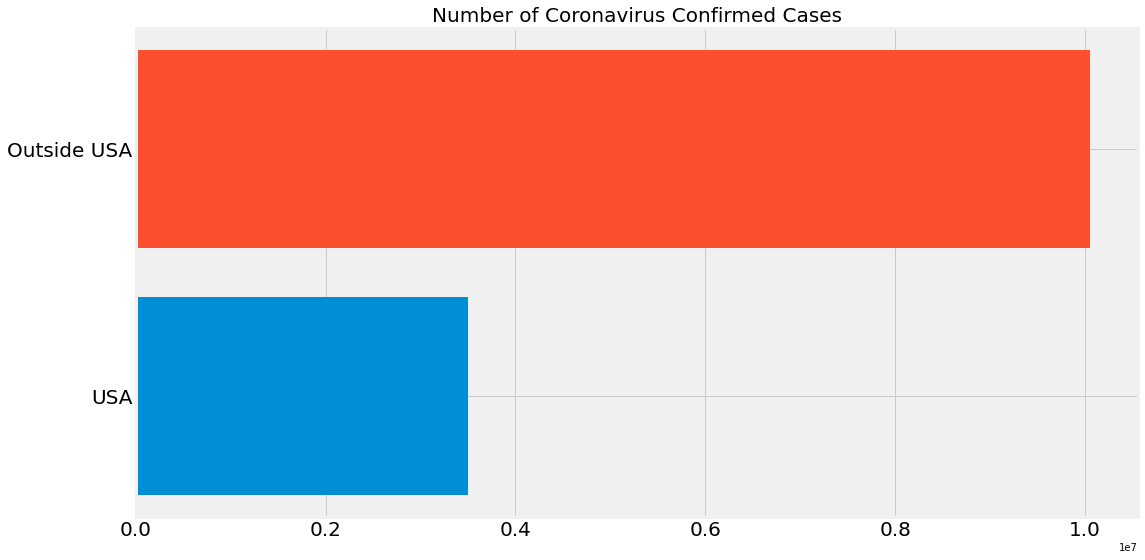

In [40]:
USA_confirmed = latest_data[latest_data['Country_Region']=='US']['Confirmed'].sum()
outside_USA_confirmed = np.sum(confirmed_by_country) - USA_confirmed
plt.figure(figsize=(16, 9))
plt.barh('USA', USA_confirmed)
plt.barh('Outside USA', outside_USA_confirmed)
plt.title('Number of Coronavirus Confirmed Cases', size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

In [41]:
print('Outside USA: {} cases'.format(outside_USA_confirmed))
print('USA: {} cases'.format(USA_confirmed))
print('Total: {} cases'.format(USA_confirmed+outside_USA_confirmed))

Outside USA: 10056630 cases
USA: 3500279 cases
Total: 13556909 cases


In [42]:
# Only show 10 countries with the most confirmed cases, the rest are grouped into the other category
visual_unique_countries = [] 
visual_confirmed_cases = []
others = np.sum(confirmed_by_country[10:])

for i in range(len(confirmed_by_country[:10])):
    visual_unique_countries.append(unique_countries[i])
    visual_confirmed_cases.append(confirmed_by_country[i])
    
visual_unique_countries.append('Others')
visual_confirmed_cases.append(others)

In [43]:
def plot_bar_graphs(x, y, title):
    plt.figure(figsize=(16, 9))
    plt.barh(x, y)
    plt.title(title, size=20)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()

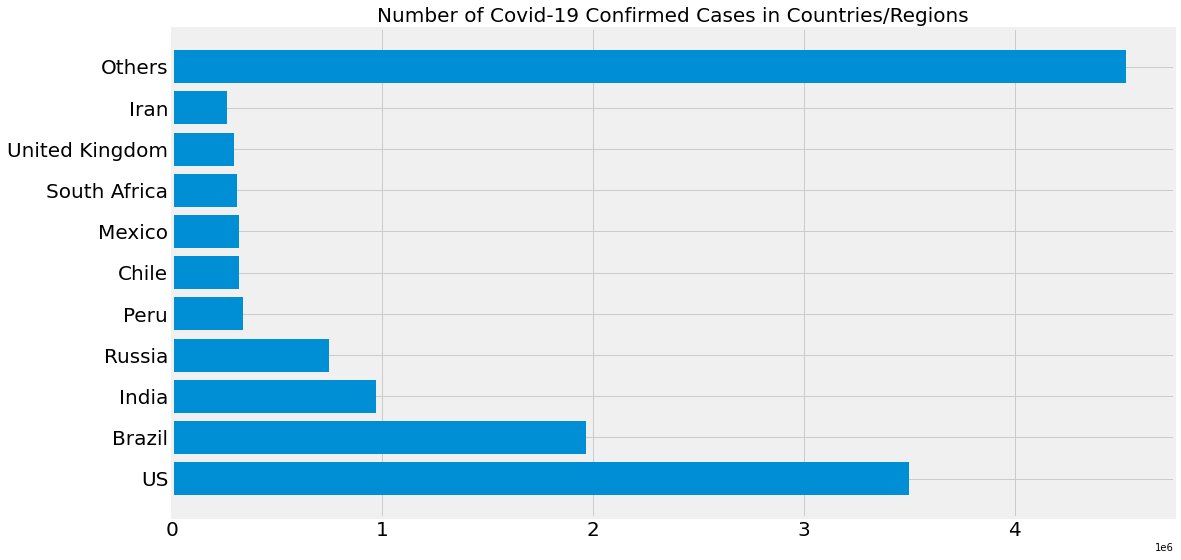

In [44]:
plot_bar_graphs(visual_unique_countries, visual_confirmed_cases, 'Number of Covid-19 Confirmed Cases in Countries/Regions')

In [45]:
def plot_pie_charts(x, y, title):
    c = random.choices(list(mcolors.CSS4_COLORS.values()),k = len(unique_countries))
    plt.figure(figsize=(12,12))
    plt.title(title, size=20)
    plt.pie(y, colors=c)
    plt.legend(x, loc='best', fontsize=15)
    plt.show()

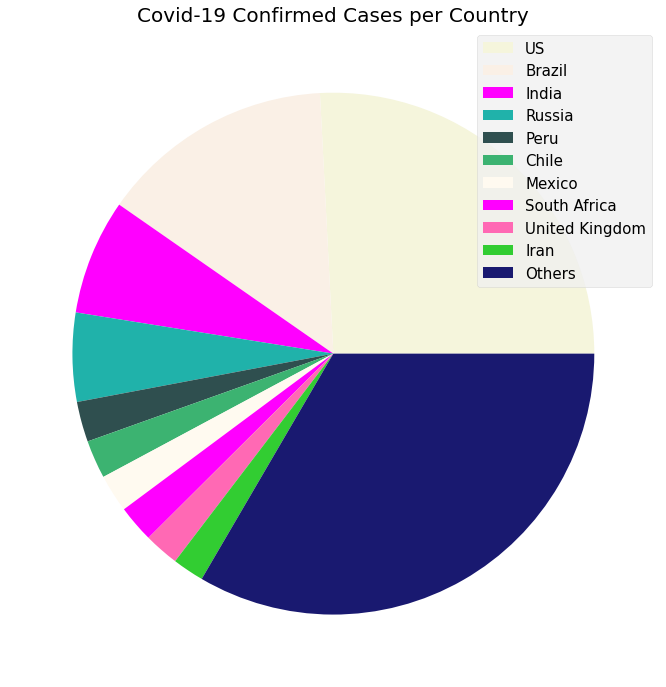

In [46]:
plot_pie_charts(visual_unique_countries, visual_confirmed_cases, 'Covid-19 Confirmed Cases per Country')

In [47]:
# Only show 10 provinces with the most confirmed cases, the rest are grouped into the others category
visual_unique_provinces = [] 
visual_confirmed_cases2 = []
others = np.sum(confirmed_by_province[10:])

for i in range(len(confirmed_by_province[:10])):
    visual_unique_provinces.append(unique_provinces[i])
    visual_confirmed_cases2.append(confirmed_by_province[i])

visual_unique_provinces.append('Others')
visual_confirmed_cases2.append(others)

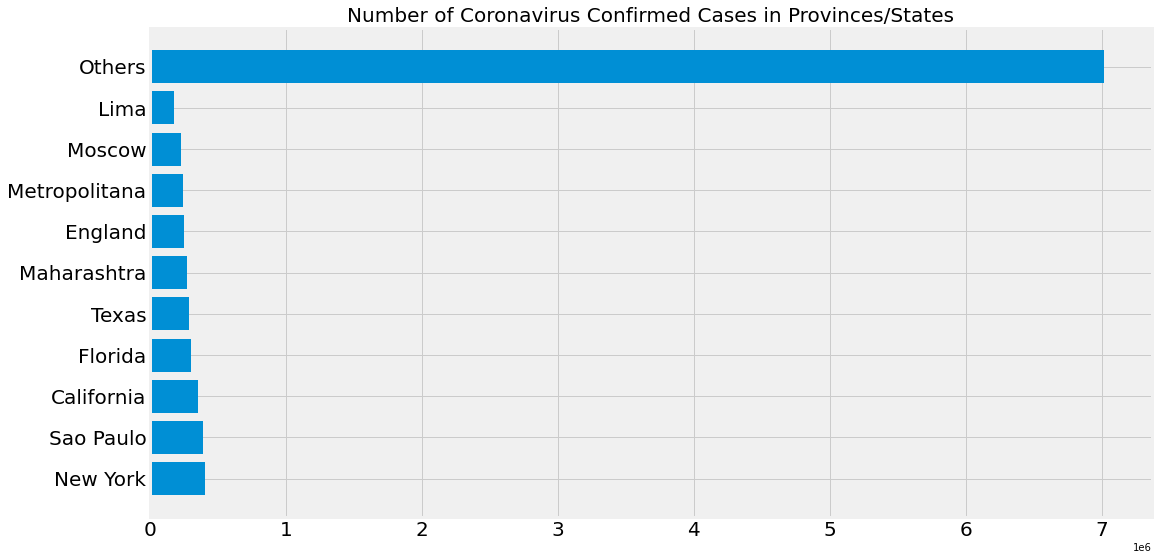

In [48]:
plot_bar_graphs(visual_unique_provinces, visual_confirmed_cases2, 'Number of Coronavirus Confirmed Cases in Provinces/States')

In [49]:
def plot_pie_country_with_regions(country_name, title):
    regions = list(latest_data[latest_data['Country_Region']==country_name]['Province_State'].unique())
    confirmed_cases = []
    no_cases = [] 

    for i in regions:
        cases = latest_data[latest_data['Province_State']==i]['Confirmed'].sum()
        if cases > 0:
            confirmed_cases.append(cases)
        else:
            no_cases.append(i)

    # remove areas with no confirmed cases
    for i in no_cases:
        regions.remove(i)

    # only show the top 10 states
    regions = [k for k, v in sorted(zip(regions, confirmed_cases), key=operator.itemgetter(1), reverse=True)]

    for i in range(len(regions)):
        confirmed_cases[i] = latest_data[latest_data['Province_State']==regions[i]]['Confirmed'].sum()  
    
    # additional province/state will be considered "others"
    if(len(regions)>10):
        regions_10 = regions[:10]
        regions_10.append('Others')
        confirmed_cases_10 = confirmed_cases[:10]
        confirmed_cases_10.append(np.sum(confirmed_cases[10:]))
        plot_pie_charts(regions_10,confirmed_cases_10, title)
    else:
        plot_pie_charts(regions,confirmed_cases, title)

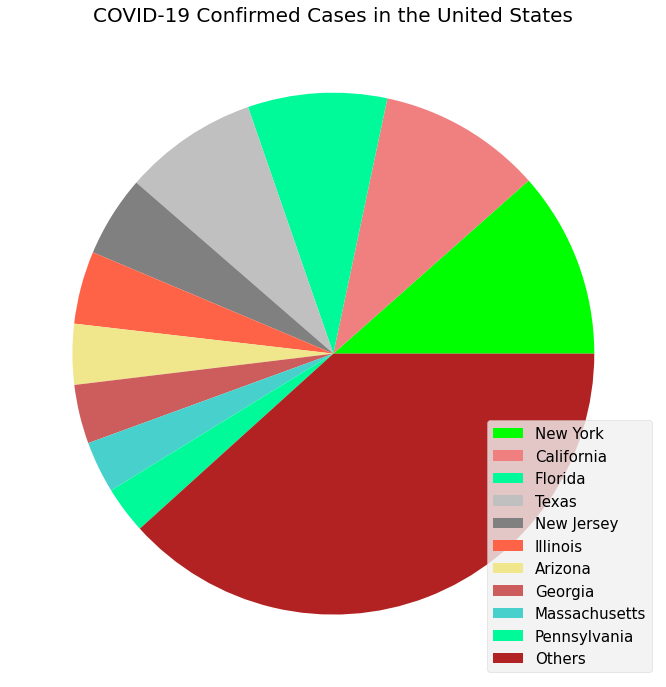

In [50]:
plot_pie_country_with_regions('US', 'COVID-19 Confirmed Cases in the United States')

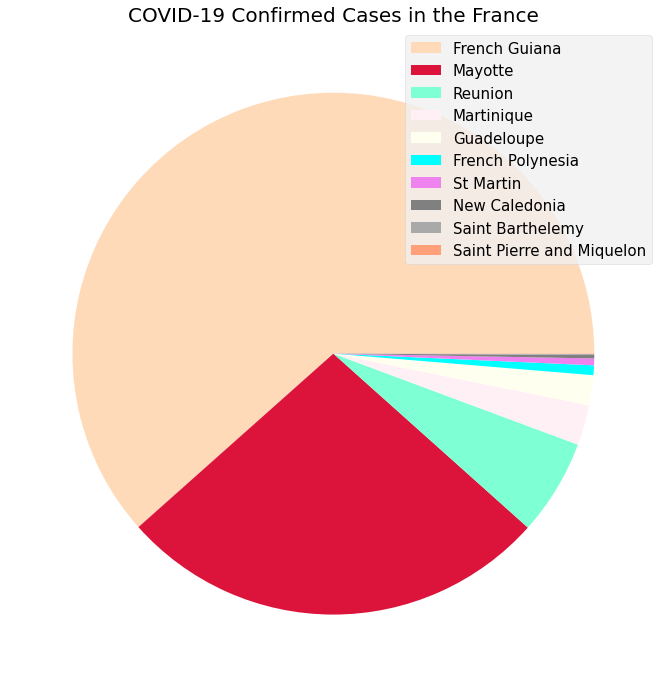

In [51]:
plot_pie_country_with_regions('France', 'COVID-19 Confirmed Cases in the France')

In [52]:
# Predicting the future

In [53]:
days_since_1_22 = np.array([i for i in range(len(dates))]).reshape(-1, 1)
world_cases = np.array(world_cases).reshape(-1, 1)
total_deaths = np.array(total_deaths).reshape(-1, 1)
total_recovered = np.array(total_recovered).reshape(-1, 1)

In [54]:
days_in_future = 20
future_forecast = np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1, 1)
adjusted_dates = future_forecast[:-20]

In [55]:
future_forecast

array([[  0],
       [  1],
       [  2],
       [  3],
       [  4],
       [  5],
       [  6],
       [  7],
       [  8],
       [  9],
       [ 10],
       [ 11],
       [ 12],
       [ 13],
       [ 14],
       [ 15],
       [ 16],
       [ 17],
       [ 18],
       [ 19],
       [ 20],
       [ 21],
       [ 22],
       [ 23],
       [ 24],
       [ 25],
       [ 26],
       [ 27],
       [ 28],
       [ 29],
       [ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 34],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 41],
       [ 42],
       [ 43],
       [ 44],
       [ 45],
       [ 46],
       [ 47],
       [ 48],
       [ 49],
       [ 50],
       [ 51],
       [ 52],
       [ 53],
       [ 54],
       [ 55],
       [ 56],
       [ 57],
       [ 58],
       [ 59],
       [ 60],
       [ 61],
       [ 62],
       [ 63],
       [ 64],
       [ 65],
       [ 66],
       [ 67],
       [ 68],
       [ 69],
       [ 70],
      

In [56]:
start = '1/22/2020'
start_date = datetime.datetime.strptime(start, '%m/%d/%Y')
future_forecast_dates = []
for i in range(len(future_forecast)):
    future_forecast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))

In [57]:
X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(days_since_1_22, world_cases, test_size=0.25, shuffle=False) 

In [58]:
# transform data for polynomial regression
poly = PolynomialFeatures(degree=3)
poly_X_train_confirmed = poly.fit_transform(X_train_confirmed)
poly_X_test_confirmed = poly.fit_transform(X_test_confirmed)
poly_future_forecast = poly.fit_transform(future_forecast)

In [59]:
# polynomial regression
linear_model = LinearRegression(normalize=True, fit_intercept=False)
linear_model.fit(poly_X_train_confirmed, y_train_confirmed)
test_linear_pred = linear_model.predict(poly_X_test_confirmed)
linear_pred = linear_model.predict(poly_future_forecast)
print('MAE:', mean_absolute_error(test_linear_pred, y_test_confirmed))
print('MSE:',mean_squared_error(test_linear_pred, y_test_confirmed))

MAE: 2201874.397401007
MSE: 5565971124337.986


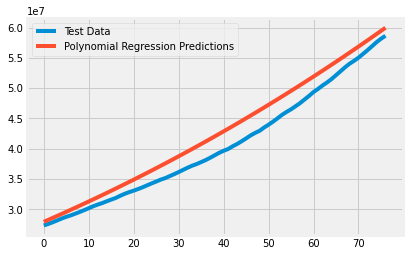

In [60]:
plt.plot(y_test_confirmed)
plt.plot(test_linear_pred)
plt.legend(['Test Data', 'Polynomial Regression Predictions'])

In [61]:
# svm_confirmed = svm_search.best_estimator_
svm_confirmed = SVR(shrinking=True, kernel='poly',gamma=0.01, epsilon=1,degree=5, C=0.1)
svm_confirmed.fit(X_train_confirmed, y_train_confirmed)
svm_pred = svm_confirmed.predict(future_forecast)

/home/aashutoshjha21022002/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


MAE: 38172085.314928725
MSE: 1930804506677993.2


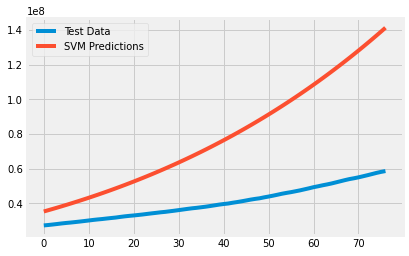

In [62]:
svm_test_pred = svm_confirmed.predict(X_test_confirmed)
plt.plot(y_test_confirmed)
plt.plot(svm_test_pred)
plt.legend(['Test Data', 'SVM Predictions'])
print('MAE:', mean_absolute_error(svm_test_pred, y_test_confirmed))
print('MSE:',mean_squared_error(svm_test_pred, y_test_confirmed))

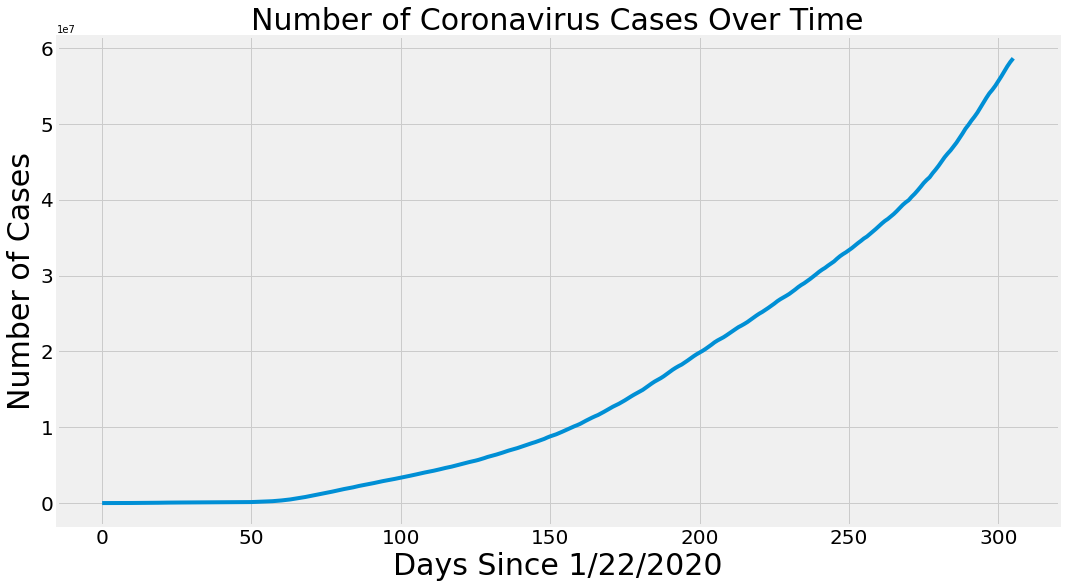

In [63]:
adjusted_dates = adjusted_dates.reshape(1, -1)[0]
plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, world_cases)
plt.title('Number of Coronavirus Cases Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('Number of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

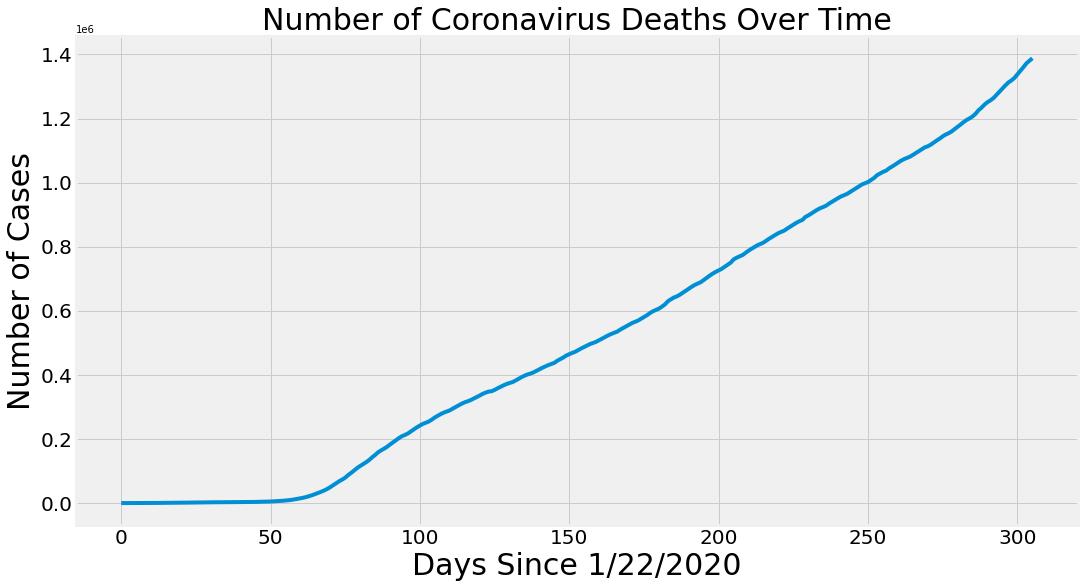

In [64]:
plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, total_deaths)
plt.title('Number of Coronavirus Deaths Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('Number of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

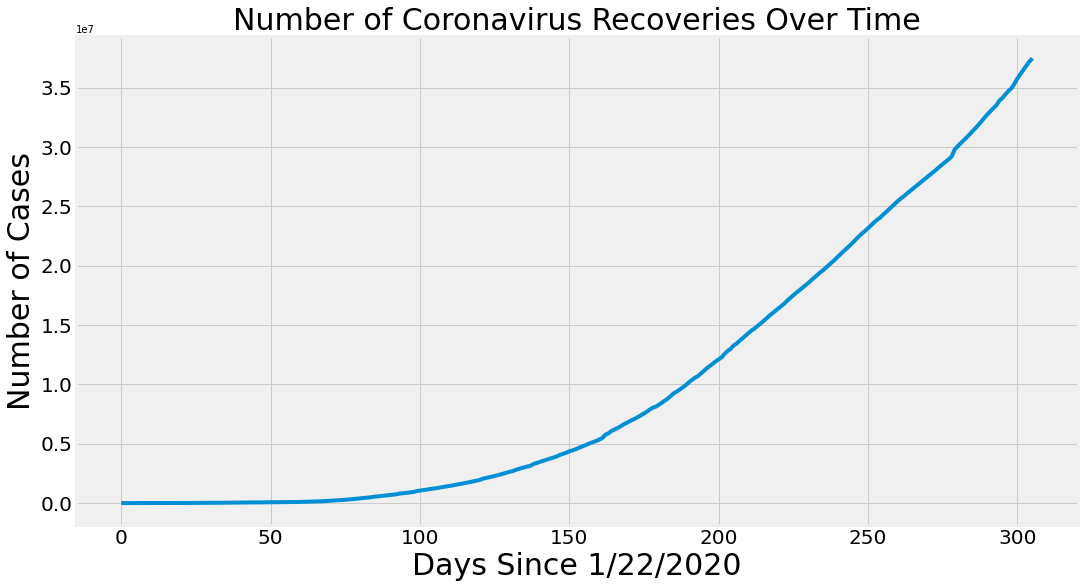

In [65]:
plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, total_recovered)
plt.title('Number of Coronavirus Recoveries Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('Number of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

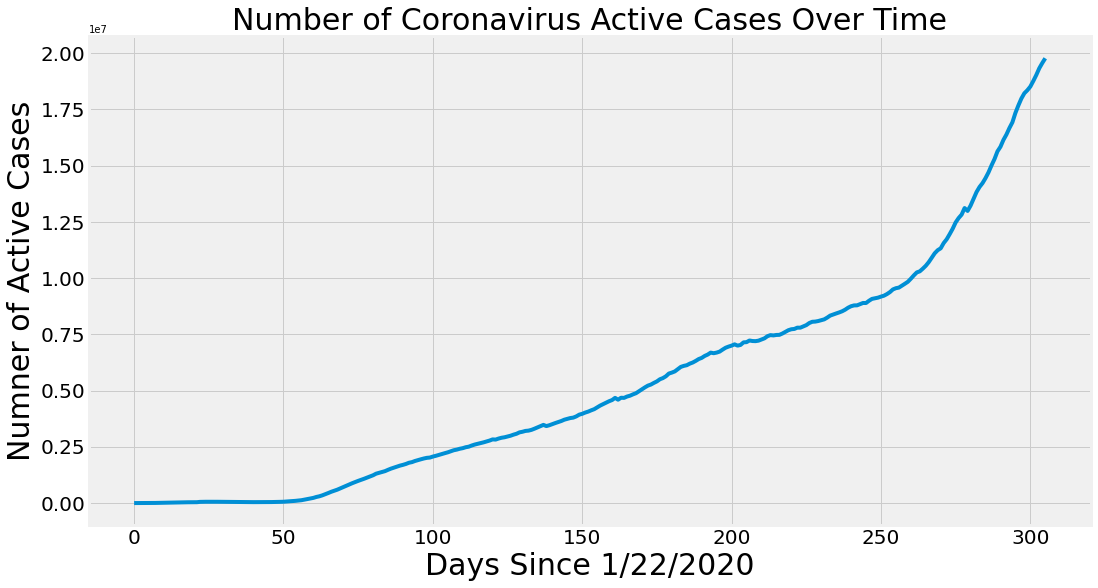

In [66]:
plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, total_active)
plt.title('Number of Coronavirus Active Cases Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('Numner of Active Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

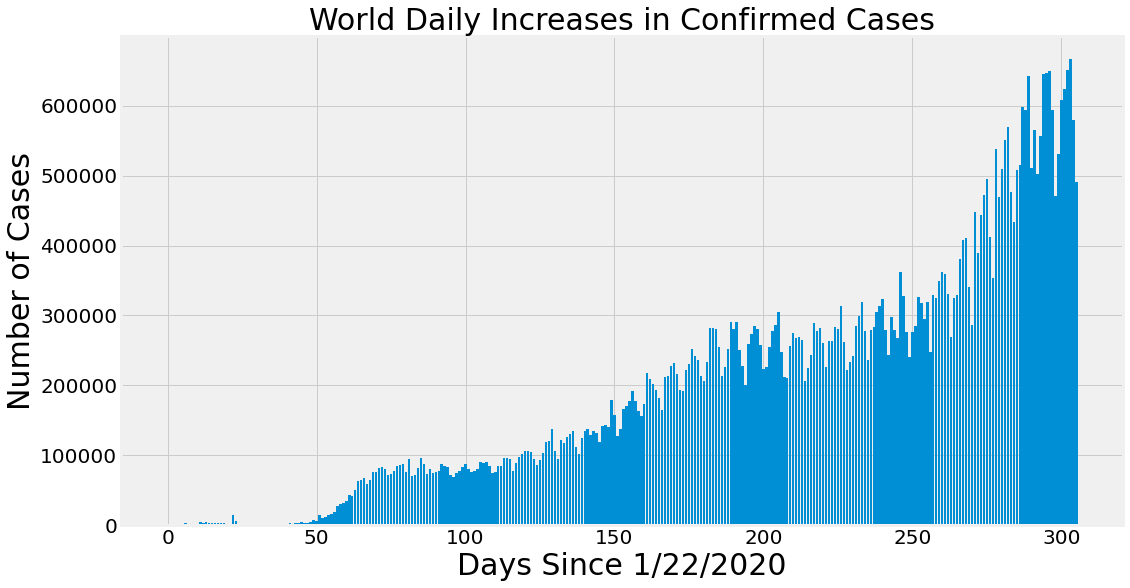

In [67]:
plt.figure(figsize=(16, 9))
plt.bar(adjusted_dates, world_daily_increase)
plt.title('World Daily Increases in Confirmed Cases', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('Number of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

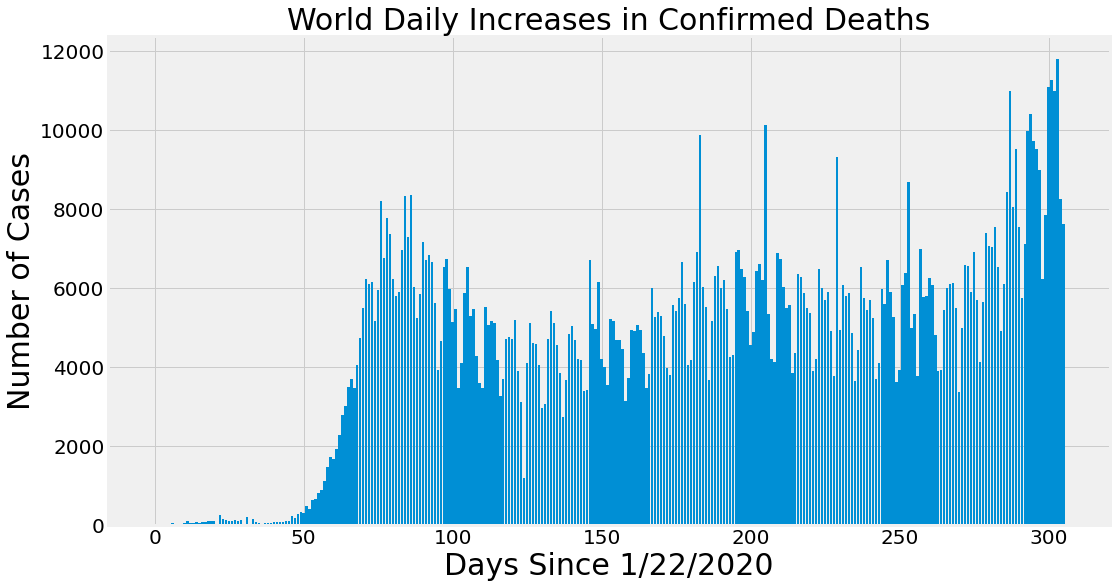

In [68]:
plt.figure(figsize=(16, 9))
plt.bar(adjusted_dates, world_daily_death)
plt.title('World Daily Increases in Confirmed Deaths', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('Number of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

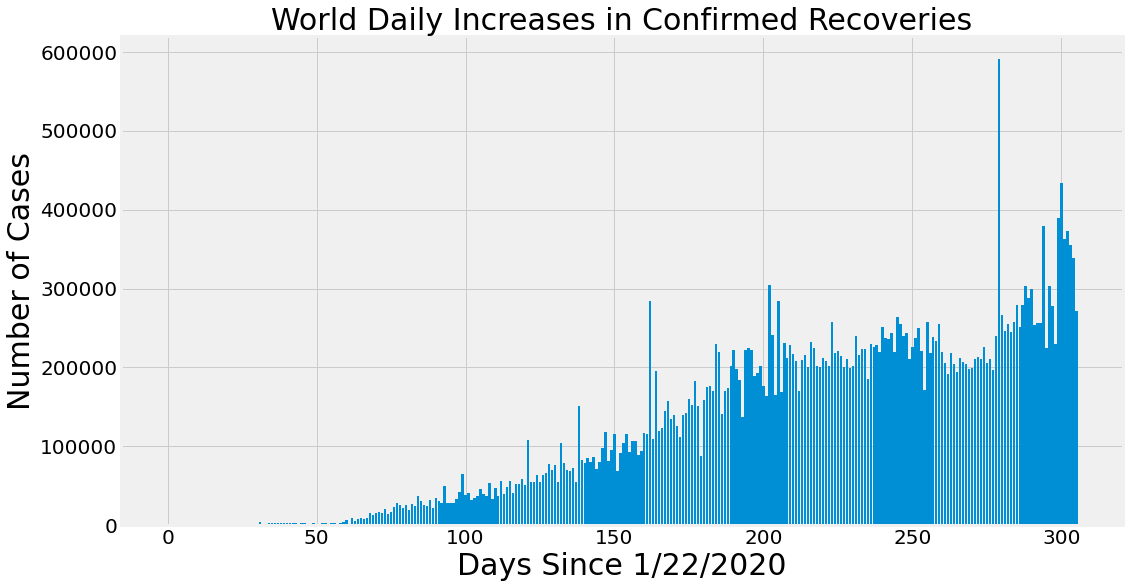

In [69]:
plt.figure(figsize=(16, 9))
plt.bar(adjusted_dates, world_daily_recovery)
plt.title('World Daily Increases in Confirmed Recoveries', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('Number of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

In [70]:
def plot_predictions(x, y, pred, algo_name, color):
    plt.figure(figsize=(16, 9))
    plt.plot(x, y)
    plt.plot(future_forecast, pred, linestyle='dashed', color=color)
    plt.title('Number of Coronavirus Cases Over Time', size=30)
    plt.xlabel('Days Since 1/22/2020', size=30)
    plt.ylabel('Number of Cases', size=30)
    plt.legend(['Confirmed Cases', algo_name], prop={'size': 20})
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()

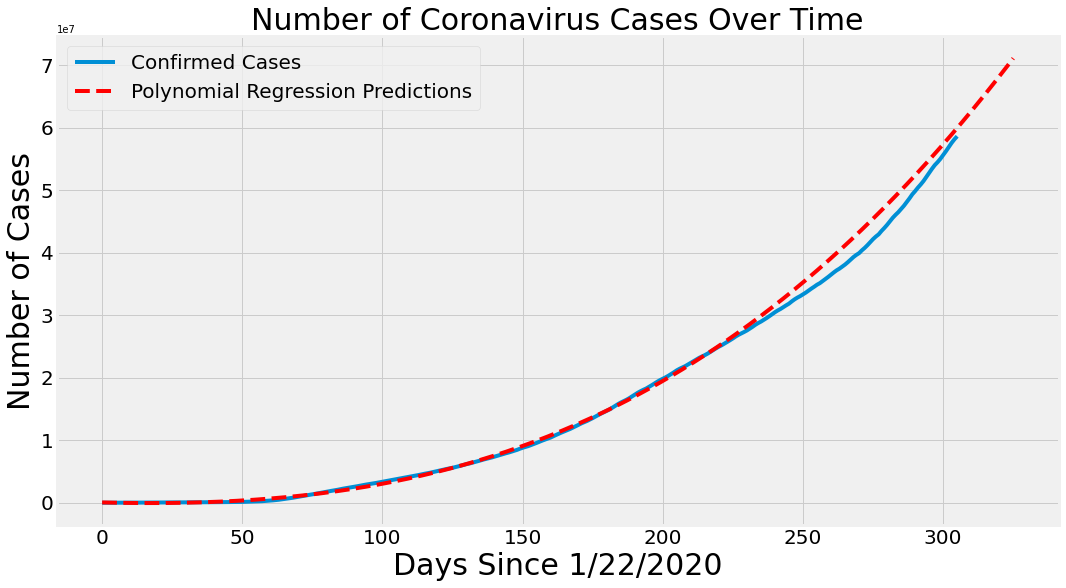

In [71]:
plot_predictions(adjusted_dates, world_cases, linear_pred, 'Polynomial Regression Predictions', 'red')

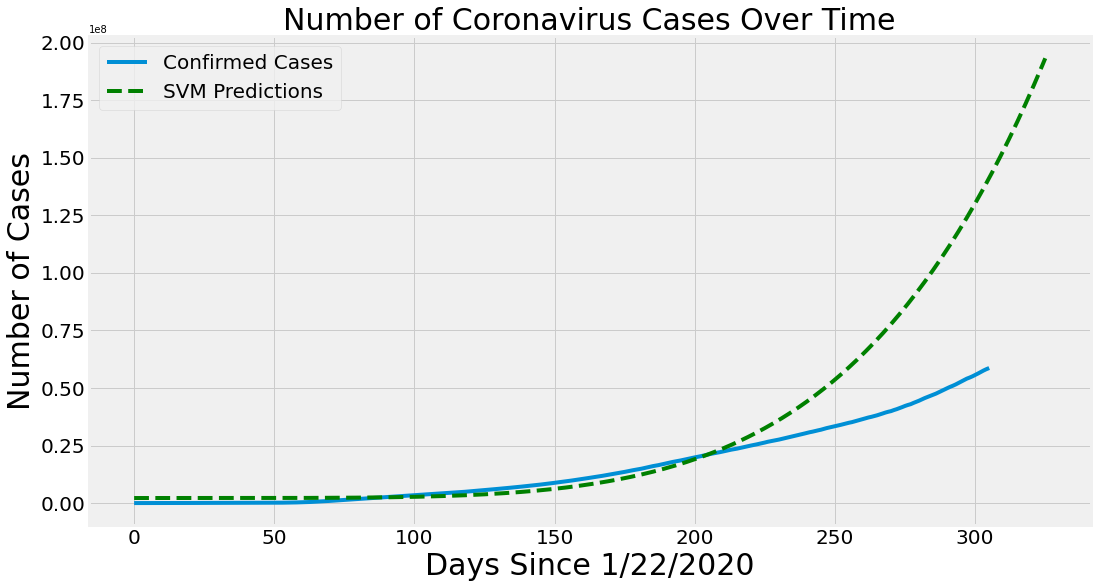

In [72]:
plot_predictions(adjusted_dates, world_cases, svm_pred, 'SVM Predictions', 'green')

In [73]:
# Future predictions using polynomial regression
linear_pred = linear_pred.reshape(1,-1)[0]
poly_df = pd.DataFrame({'Date': future_forecast_dates[-20:], 'Predicted number of Confirmed Cases Worldwide': np.round(linear_pred[-20:])})
poly_df

,Date,Predicted number of Confirmed Cases Worldwide
0,11/23/2020,60504133.0
1,11/24/2020,61035834.0
2,11/25/2020,61570529.0
3,11/26/2020,62108226.0
4,11/27/2020,62648933.0
5,11/28/2020,63192658.0
6,11/29/2020,63739409.0
7,11/30/2020,64289194.0
8,12/01/2020,64842021.0
9,12/02/2020,65397898.0


In [74]:
# Future predictions using SVM 
svm_df = pd.DataFrame({'Date': future_forecast_dates[-20:], 'SVM Predicted # of Confirmed Cases Worldwide': np.round(svm_pred[-20:])})
svm_df

,Date,SVM Predicted # of Confirmed Cases Worldwide
0,11/23/2020,143511856.0
1,11/24/2020,145836182.0
2,11/25/2020,148190991.0
3,11/26/2020,150576581.0
4,11/27/2020,152993254.0
5,11/28/2020,155441311.0
6,11/29/2020,157921058.0
7,11/30/2020,160432801.0
8,12/01/2020,162976849.0
9,12/02/2020,165553512.0


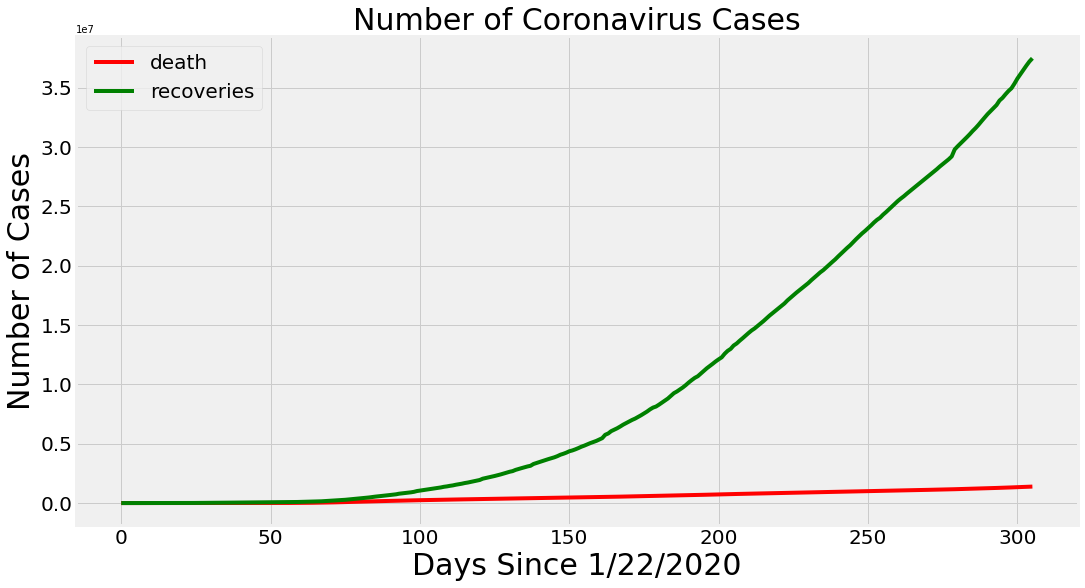

In [75]:
plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, total_deaths, color='r')
plt.plot(adjusted_dates, total_recovered, color='green')
plt.legend(['death', 'recoveries'], loc='best', fontsize=20)
plt.title('Number of Coronavirus Cases', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('Number of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

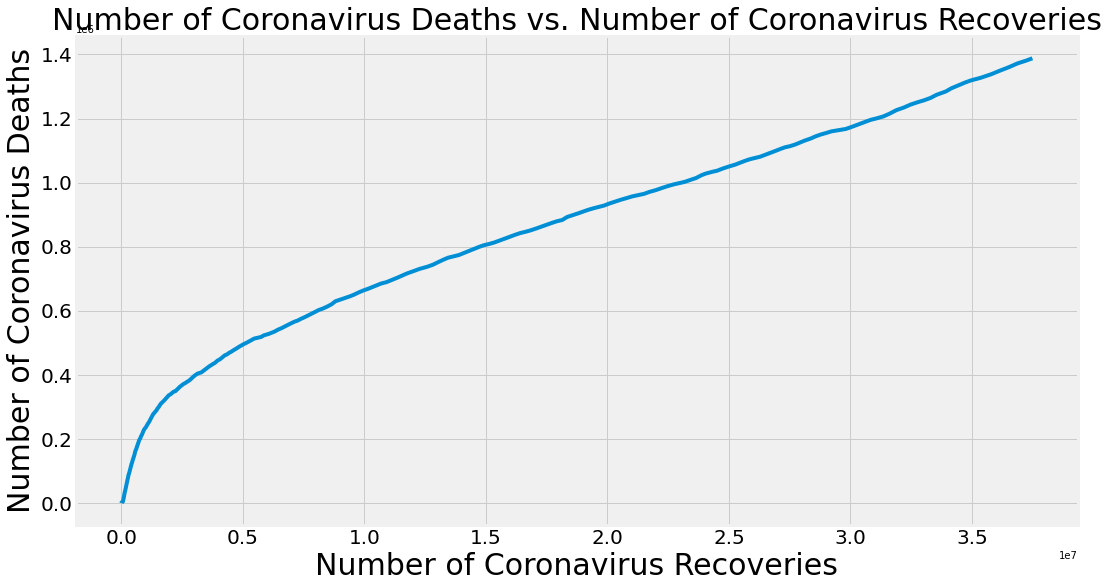

In [76]:
plt.figure(figsize=(16, 9))
plt.plot(total_recovered, total_deaths)
plt.title('Number of Coronavirus Deaths vs. Number of Coronavirus Recoveries', size=30)
plt.xlabel('Number of Coronavirus Recoveries', size=30)
plt.ylabel('Number of Coronavirus Deaths', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

In [77]:
def country_plot(x, y1, y2, y3, y4, country):
    plt.figure(figsize=(16, 9))
    plt.plot(x, y1)
    plt.title('{} Confirmed Cases'.format(country), size=30)
    plt.xlabel('Days Since 1/22/2020', size=30)
    plt.ylabel('Number of Cases', size=30)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()

    plt.figure(figsize=(16, 9))
    plt.bar(x, y2)
    plt.title('{} Daily Increases in Confirmed Cases'.format(country), size=30)
    plt.xlabel('Days Since 1/22/2020', size=30)
    plt.ylabel('Number of Cases', size=30)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()

    plt.figure(figsize=(16, 9))
    plt.bar(x, y3)
    plt.title('{} Daily Increases in Deaths'.format(country), size=30)
    plt.xlabel('Days Since 1/22/2020', size=30)
    plt.ylabel('Number of Cases', size=30)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()

    plt.figure(figsize=(16, 9))
    plt.bar(x, y4)
    plt.title('{} Daily Increases in Recoveries'.format(country), size=30)
    plt.xlabel('Days Since 1/22/2020', size=30)
    plt.ylabel('Number of Cases', size=30)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()

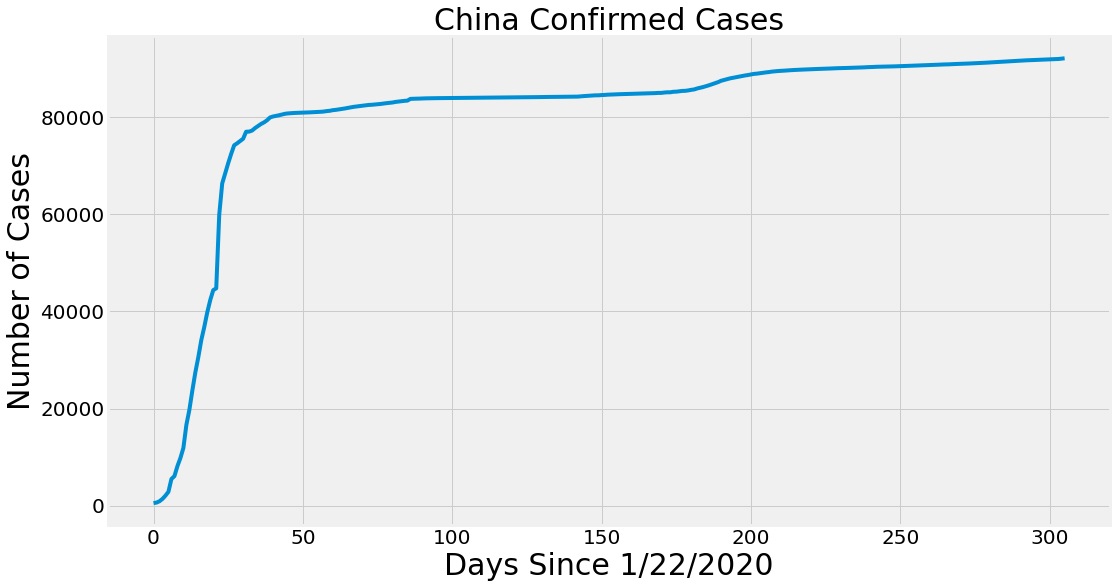

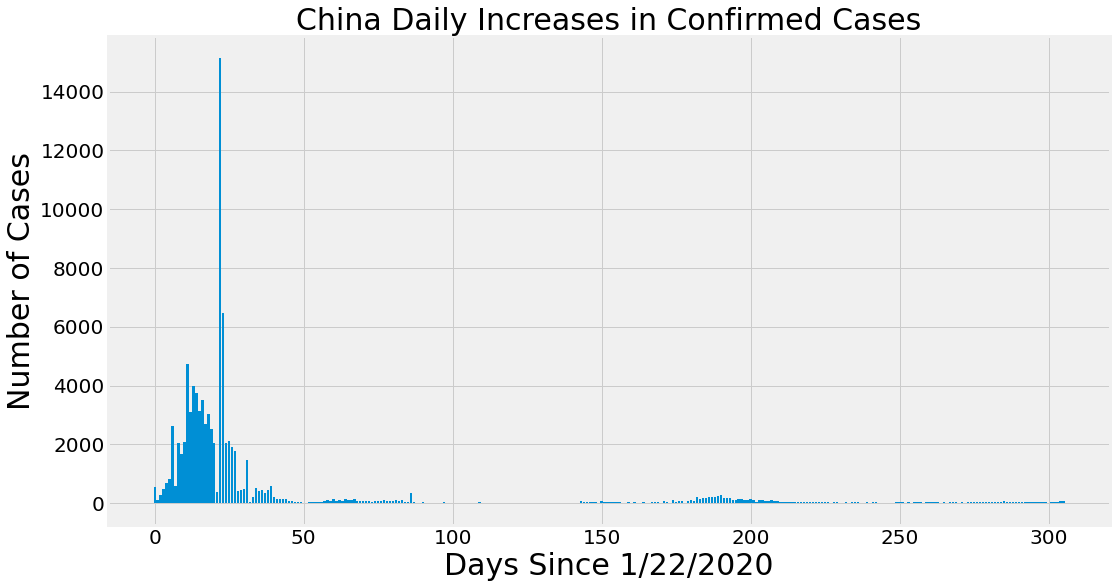

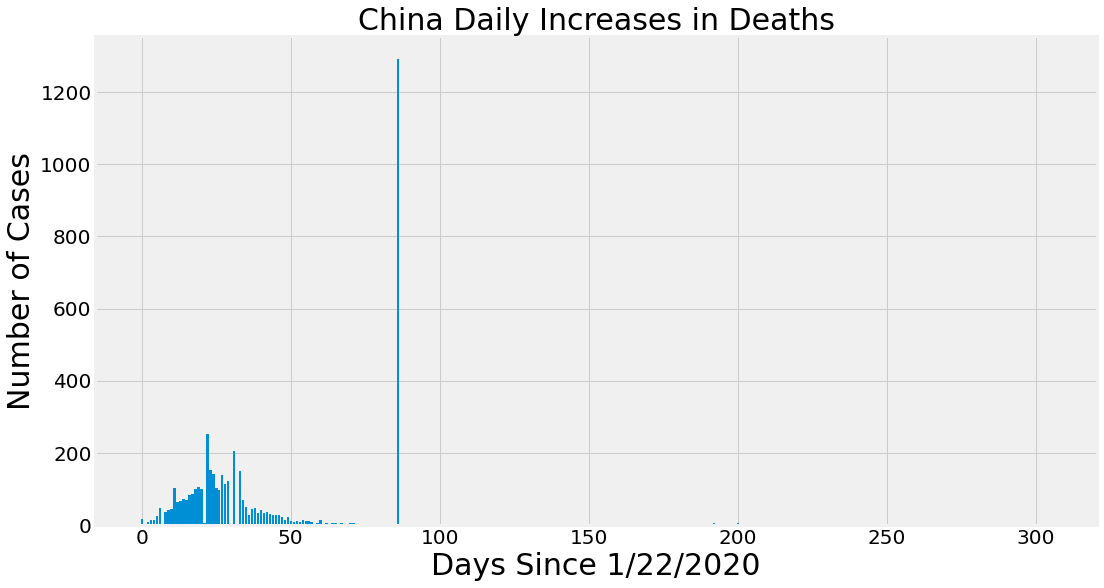

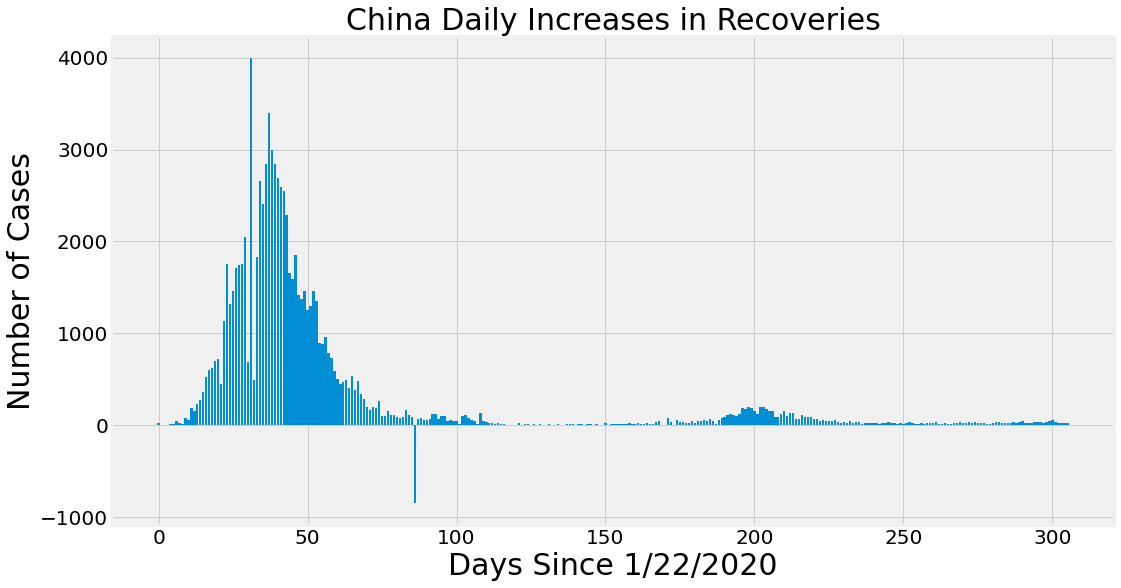

In [78]:
country_plot(adjusted_dates, china_cases, china_daily_increase, china_daily_death, china_daily_recovery, 'China')

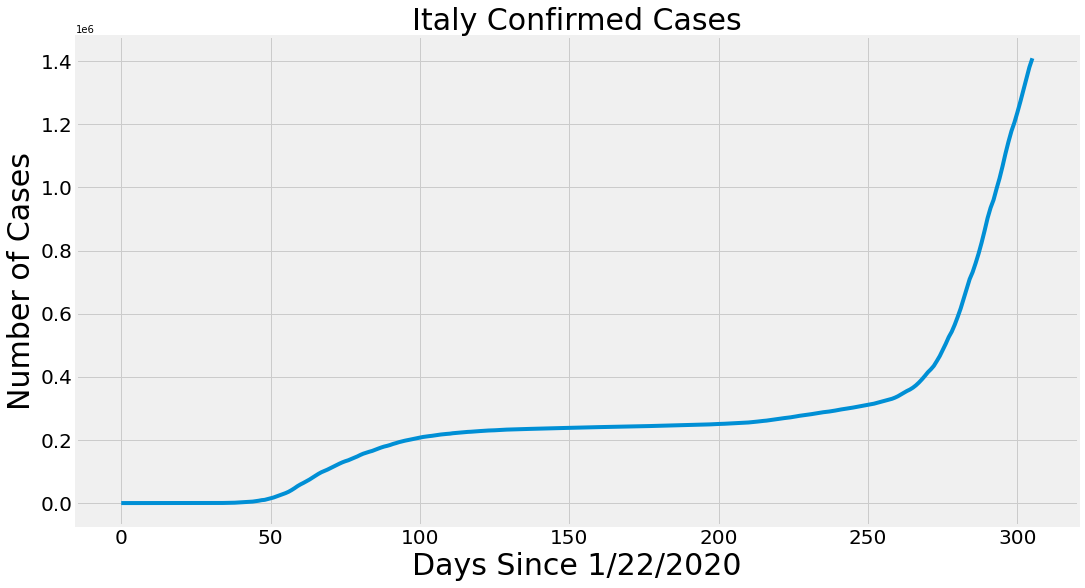

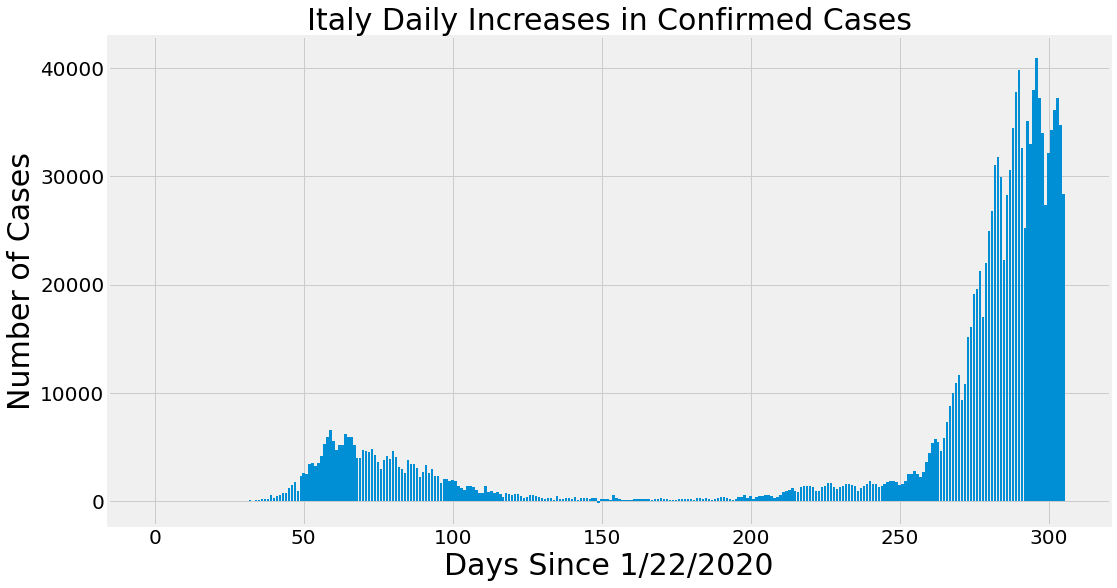

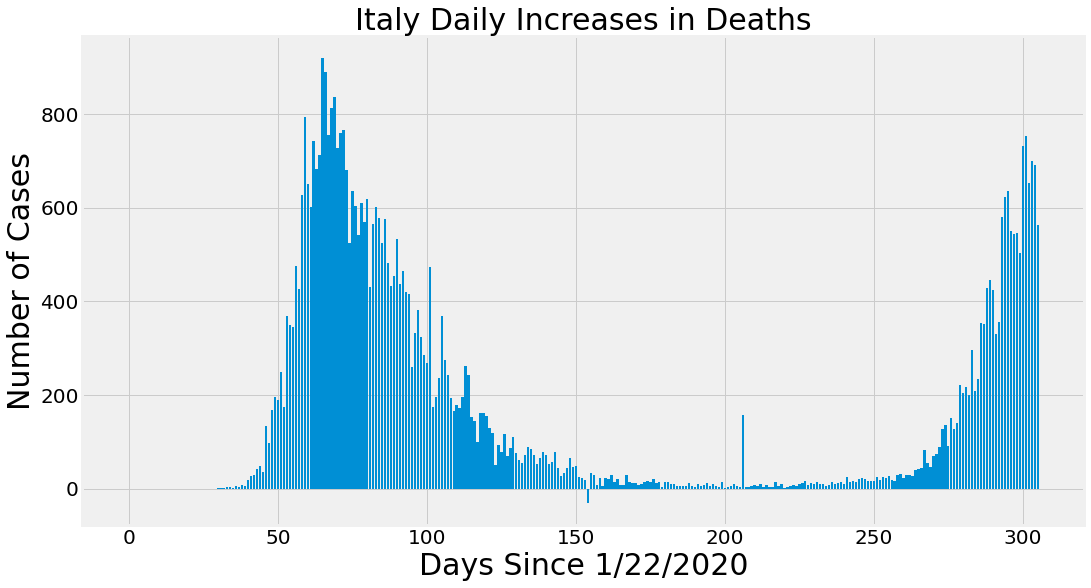

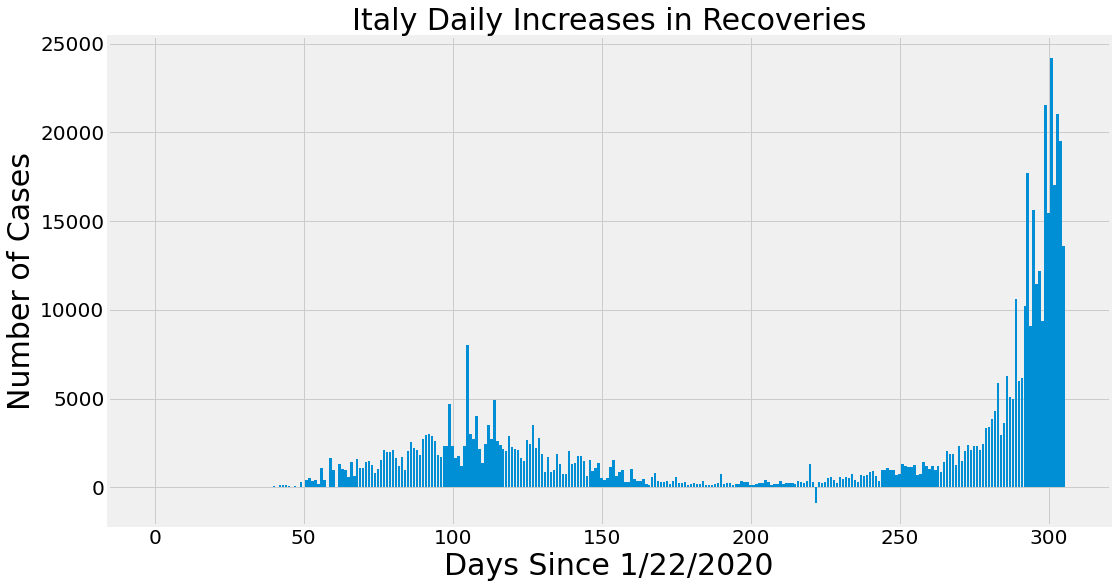

In [79]:
country_plot(adjusted_dates, italy_cases, italy_daily_increase, italy_daily_death, italy_daily_recovery, 'Italy')

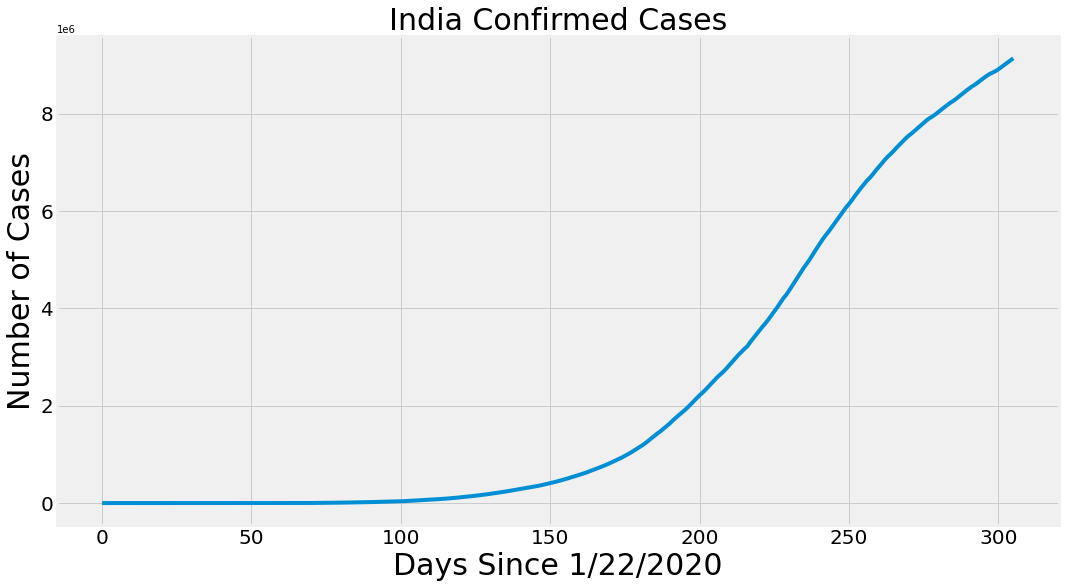

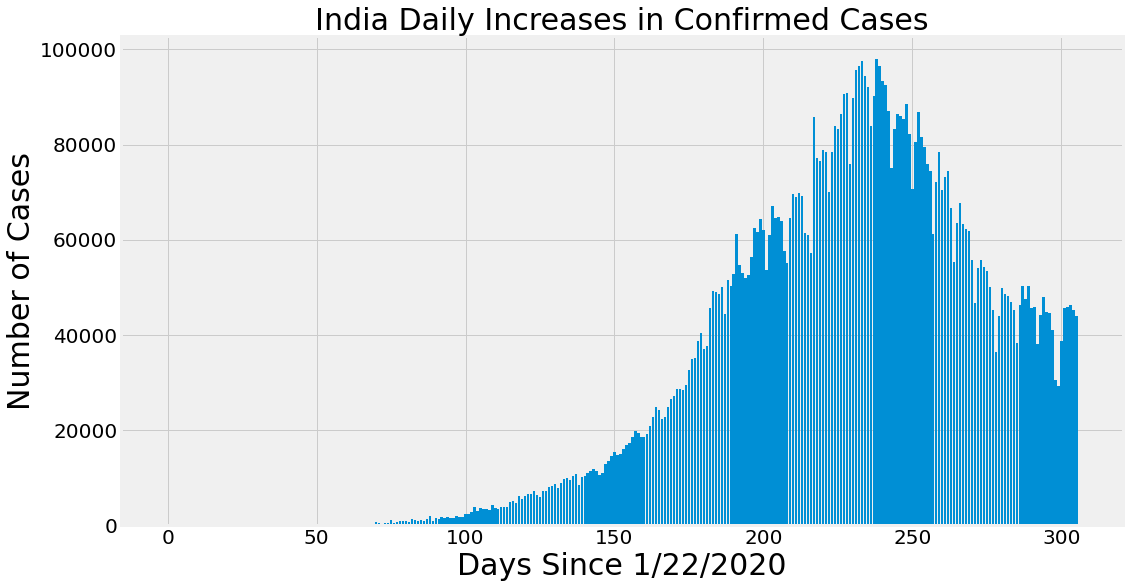

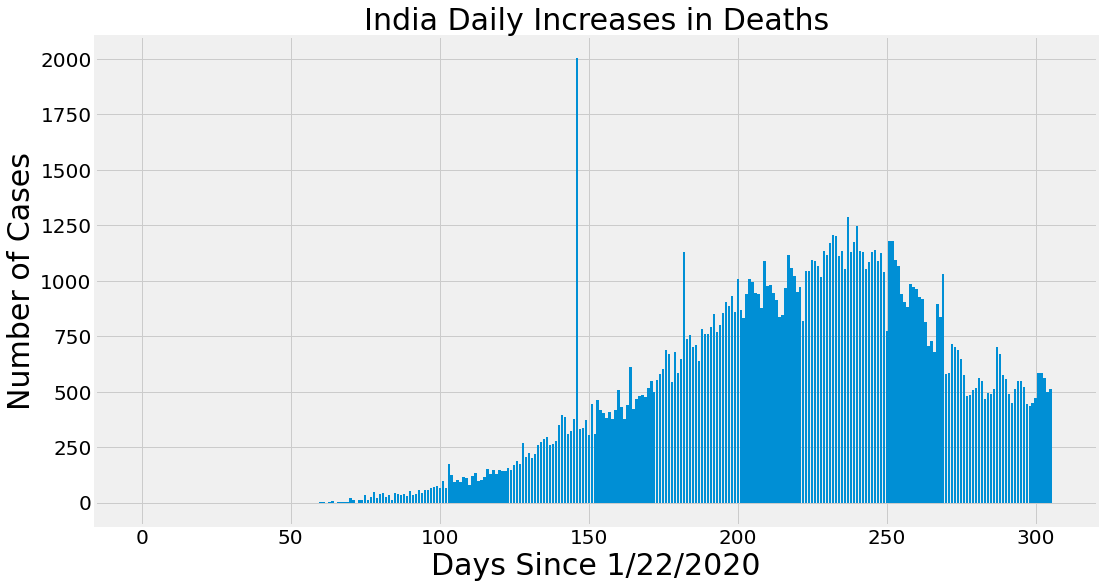

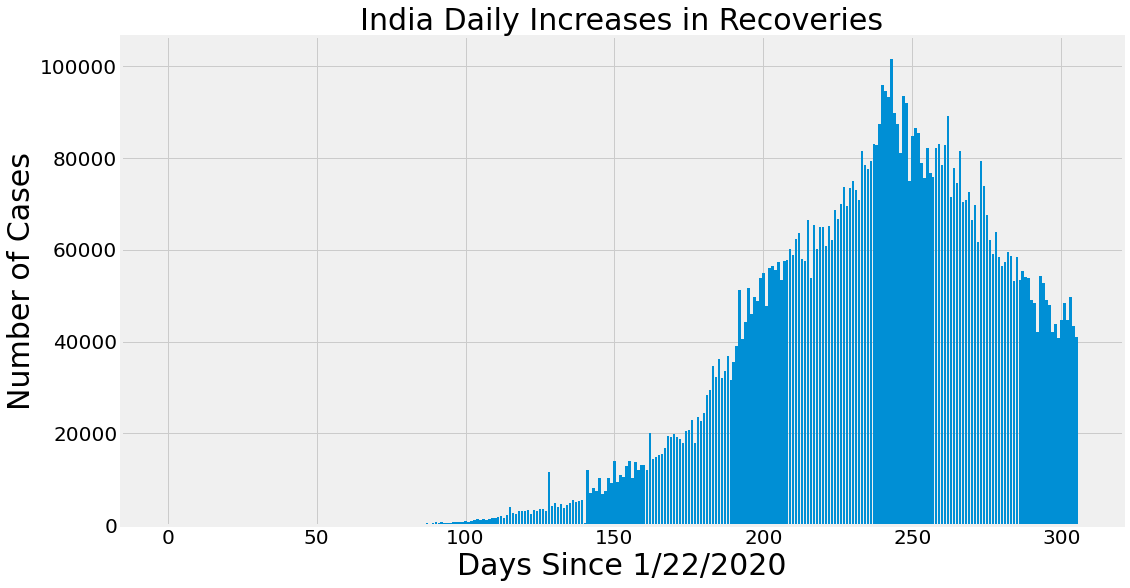

In [80]:
country_plot(adjusted_dates, india_cases, india_daily_increase, india_daily_death, india_daily_recovery, 'India')

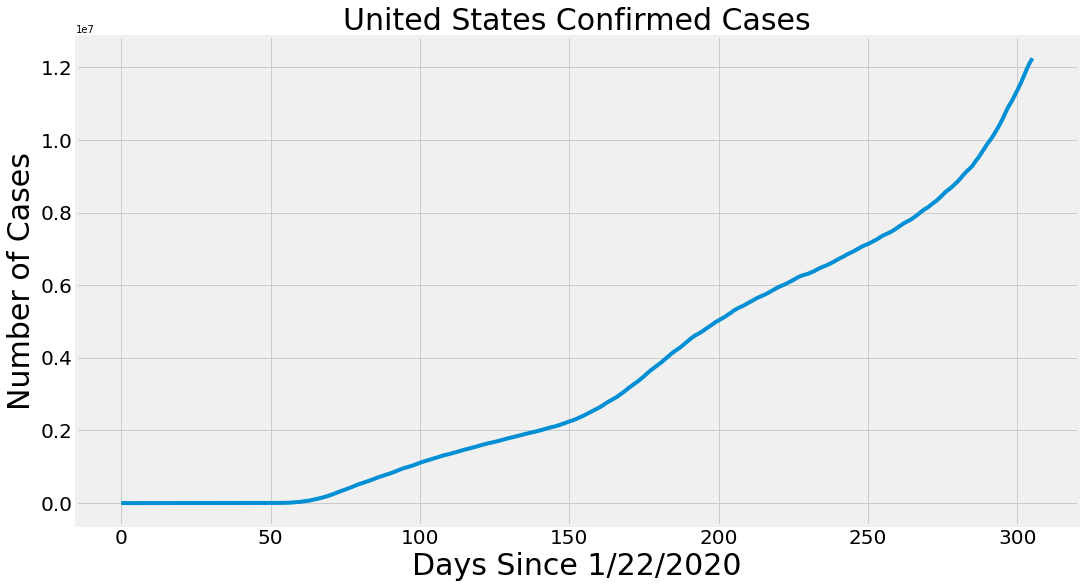

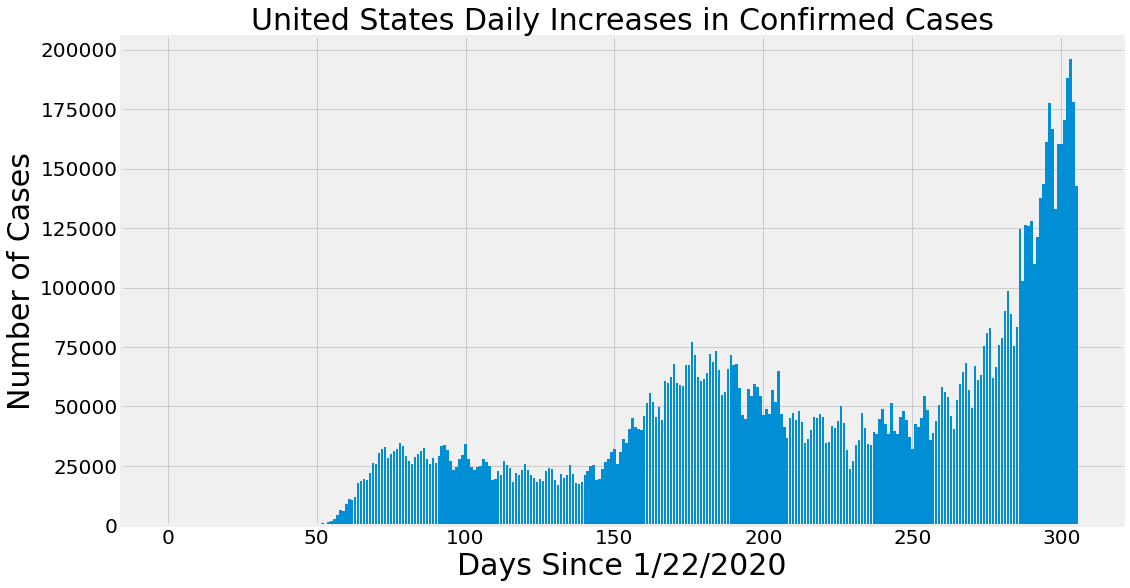

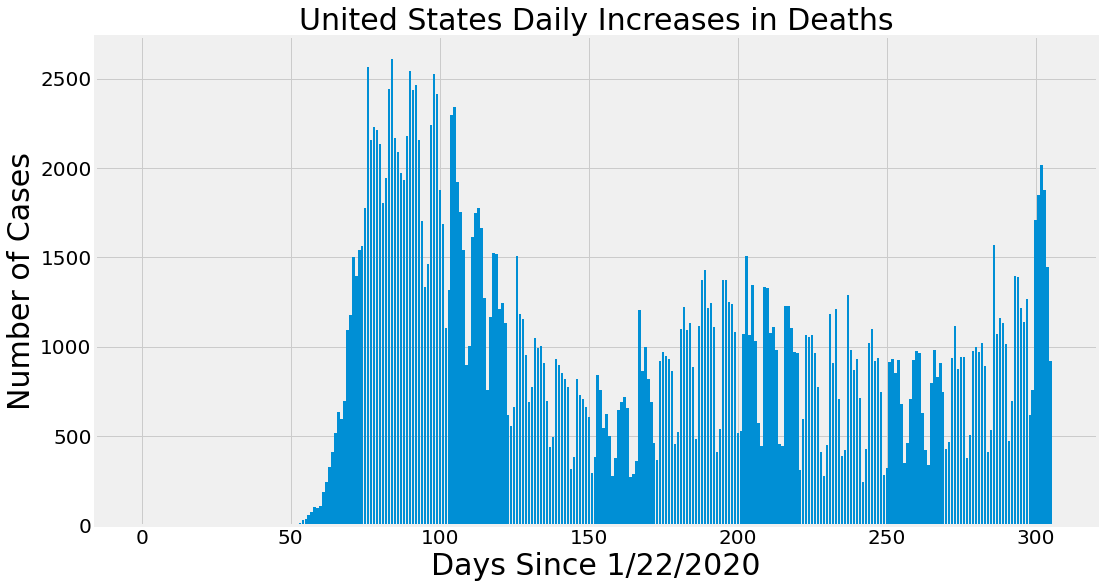

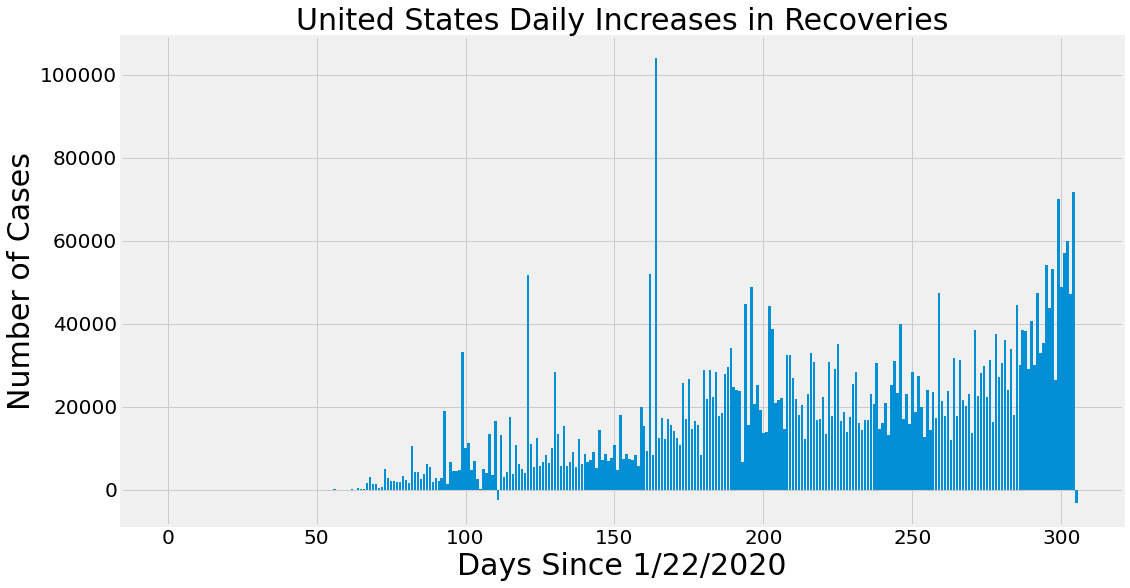

In [81]:
country_plot(adjusted_dates, us_cases, us_daily_increase, us_daily_death, us_daily_recovery, 'United States')

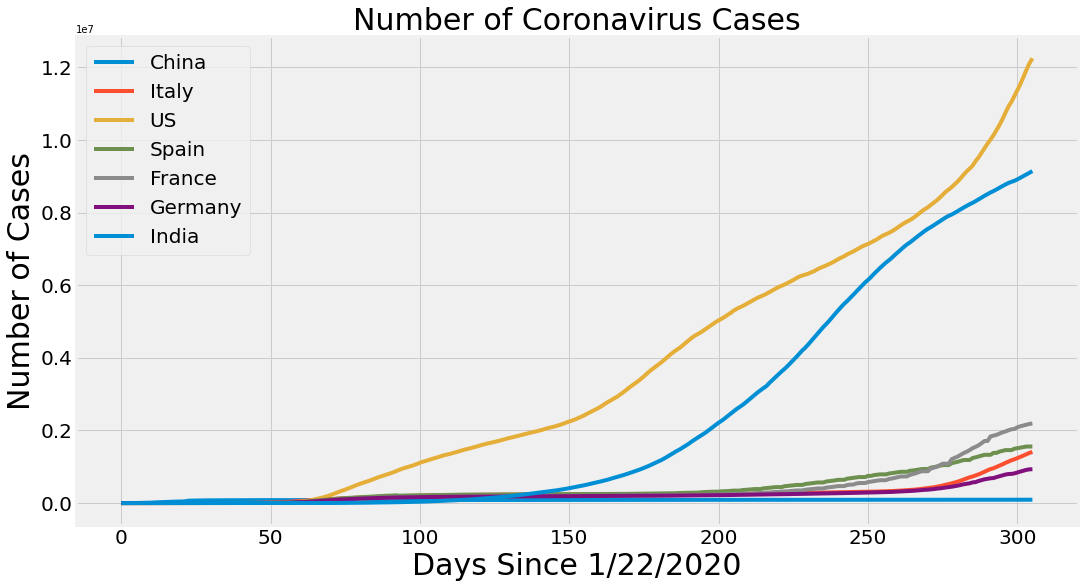

In [82]:
plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, china_cases)
plt.plot(adjusted_dates, italy_cases)
plt.plot(adjusted_dates, us_cases)
plt.plot(adjusted_dates, spain_cases)
plt.plot(adjusted_dates, france_cases)
plt.plot(adjusted_dates, germany_cases)
plt.plot(adjusted_dates, india_cases)
plt.title('Number of Coronavirus Cases', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('Number of Cases', size=30)
plt.legend(['China', 'Italy', 'US', 'Spain', 'France', 'Germany', 'India'], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

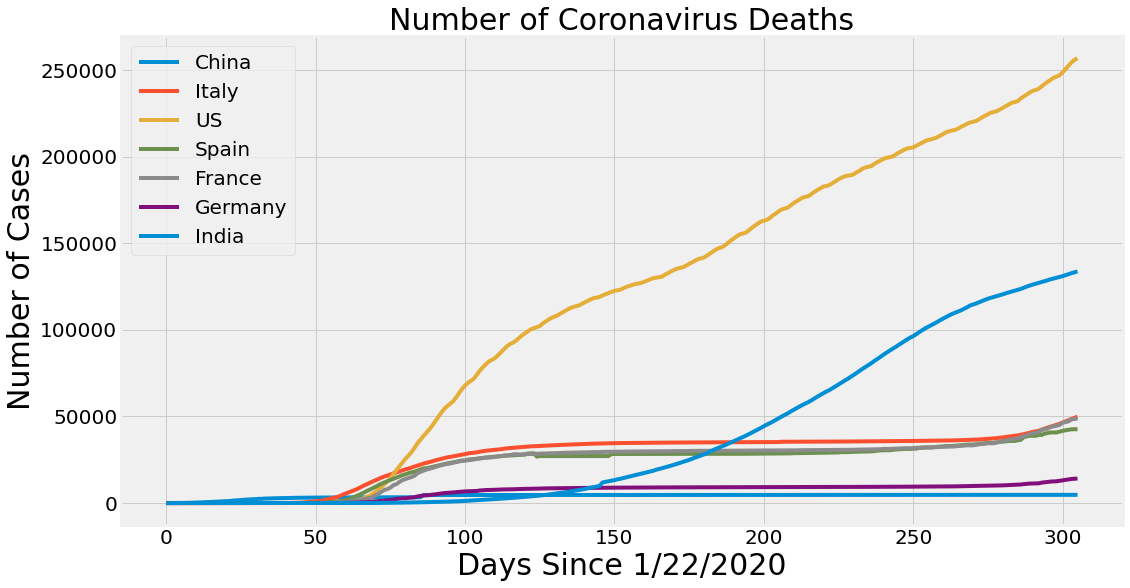

In [83]:
plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, china_deaths)
plt.plot(adjusted_dates, italy_deaths)
plt.plot(adjusted_dates, us_deaths)
plt.plot(adjusted_dates, spain_deaths)
plt.plot(adjusted_dates, france_deaths)
plt.plot(adjusted_dates, germany_deaths)
plt.plot(adjusted_dates, india_deaths)
plt.title('Number of Coronavirus Deaths', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('Number of Cases', size=30)
plt.legend(['China', 'Italy', 'US', 'Spain', 'France', 'Germany', 'India'], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

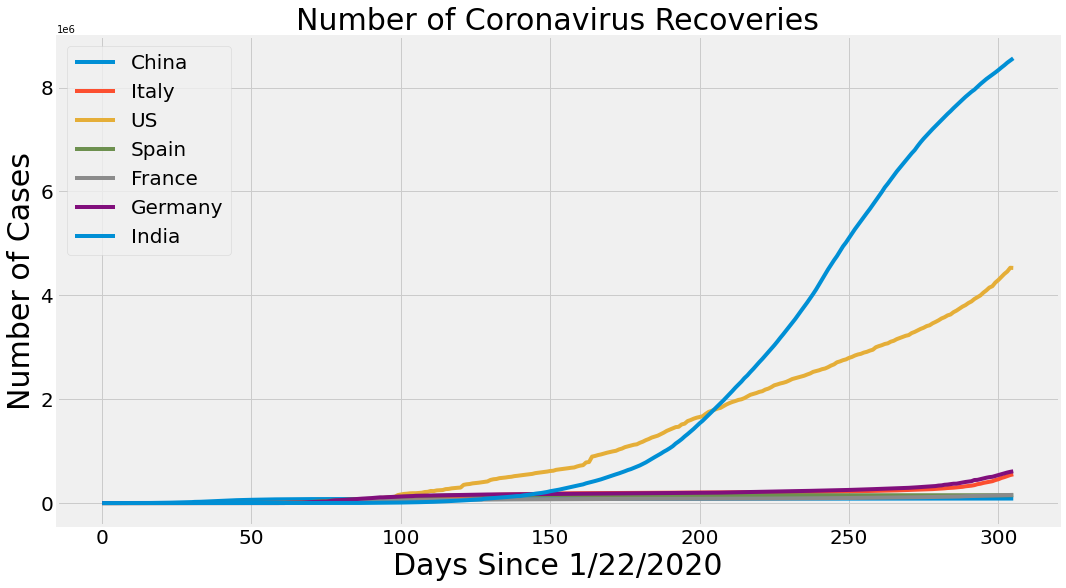

In [84]:
plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, china_recoveries)
plt.plot(adjusted_dates, italy_recoveries)
plt.plot(adjusted_dates, us_recoveries)
plt.plot(adjusted_dates, spain_recoveries)
plt.plot(adjusted_dates, france_recoveries)
plt.plot(adjusted_dates, germany_recoveries)
plt.plot(adjusted_dates, india_recoveries)
plt.title('Number of Coronavirus Recoveries', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('Number of Cases', size=30)
plt.legend(['China', 'Italy', 'US', 'Spain', 'France', 'Germany', 'India'], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

In [17]:
import csv
data = open("D:\LL.csv")
data = csv.reader(data)  
print(data)



In [20]:
import pandas as pd

states_data = pd.read_csv("D:\LL.csv")

print(states_data.head(20))

   country_code   latitude   longitude                 country usa_state_code  \
0            AD  42.546245    1.601554                 Andorra             AK   
1            AE  23.424076   53.847818    United Arab Emirates             AL   
2            AF  33.939110   67.709953             Afghanistan             AR   
3            AG  17.060816  -61.796428     Antigua and Barbuda             AZ   
4            AI  18.220554  -63.068615                Anguilla             CA   
5            AL  41.153332   20.168331                 Albania             CO   
6            AM  40.069099   45.038189                 Armenia             CT   
7            AN  12.226079  -69.060087    Netherlands Antilles             DC   
8            AO -11.202692   17.873887                  Angola             DE   
9            AQ -75.250973   -0.071389              Antarctica             FL   
10           AR -38.416097  -63.616672               Argentina             GA   
11           AS -14.270972 -

In [22]:
pip install html-to-csv

Note: you may need to restart the kernel to use updated packages.


In [17]:
import os 
import sys 
import pandas as pd 
from bs4 import BeautifulSoup 
   
path = 'D:\html.html'
   
# empty list 
data = [] 
   
# for getting the header from 
# the HTML file 
list_header = [] 
soup = BeautifulSoup(open(path),'html.parser') 
header = soup.find_all("table")[0].find("tr") 
  
for items in header: 
    try: 
        list_header.append(items.get_text()) 
    except: 
        continue
  
# for getting the data  
HTML_data = soup.find_all("table")[0].find_all("tr")[1:] 
  
for element in HTML_data: 
    sub_data = [] 
    for sub_element in element: 
        try: 
            sub_data.append(sub_element.get_text()) 
        except: 
            continue
    data.append(sub_data) 
  
# Storing the data into Pandas 
# DataFrame  
dataFrame = pd.DataFrame(data = data, columns = list_header) 
   
# Converting Pandas DataFrame 
# into CSV file 
dataFrame.to_csv('current_state.csv')

In [23]:
import pandas as pd
df_temp=pd.DataFrame()
df_new=pd.DataFrame()
for time1 in df1['time']:
        for time2 in df2['time']:
            if time1==time2:
                j=(df1[df1['time']==time].index.values.astype(int)[0])
                df_temp=df1.iloc[j]
                df_new.append(df_temp)


NameError: name 'df1' is not defined

In [43]:
import csv

f = open('D:current_state.csv')
csv_f = csv.reader(f)

current_state = []

for row in csv_f:
  print(row[1],'  ',row[2])


import csv

f = open('D:LL.csv')
csv_f = csv.reader(f)

for row in csv_f:
    current_state.append(row[1])
    current_state.append(row[2])
    print("\n")
    print(row[1], '   ',row[2])



 Latitude      Longitude 
 28.557       77.367 
 current latitude      current longitude 


latitude     longitude


42.546245     1.601554


23.424076     53.847818


33.93911     67.709953


17.060816     -61.796428


18.220554     -63.068615


41.153332     20.168331


40.069099     45.038189


12.226079     -69.060087


-11.202692     17.873887


-75.250973     -0.071389


-38.416097     -63.616672


-14.270972     -170.132217


47.516231     14.550072


-25.274398     133.775136


12.52111     -69.968338


40.143105     47.576927


43.915886     17.679076


13.193887     -59.543198


23.684994     90.356331


50.503887     4.469936


12.238333     -1.561593


42.733883     25.48583


25.930414     50.637772


-3.373056     29.918886


9.30769     2.315834


32.321384     -64.75737


4.535277     114.727669


-16.290154     -63.588653


-14.235004     -51.92528


25.03428     -77.39628


27.514162     90.433601


-54.423199     3.413194


-22.328474     24.684866


53.709807     27

In [60]:

from sklearn.datasets import make_blobs
# create the inputs and outputs
X, y = make_blobs(n_samples=[28,77], centers=None, n_features=1, random_state=2)
# summarize the shape of the arrays
print(X.shape, y.shape)
print(y)


(105, 1) (105,)
[1 0 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 0 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 0 1 0 0
 1 0 0 1 1 1 0 1 1 0 0 1 1 0 0 0 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1]


1.0
[[28.557, 77.367]] [1]
[ 1.23839154 -2.8475005 ] 1
[-1.25884111 -8.57055785] 0
[ -0.86599821 -10.50446358] 0
[ 0.59831673 -1.06451727] 1
[ 2.12309797 -1.41131072] 1
[-1.53722693 -9.61845366] 0
[ 0.92194131 -0.68709327] 1
[-1.31478732 -8.78528161] 0
[ 1.57989896 -1.462412  ] 1
[ 1.36989667 -1.3964704 ] 1


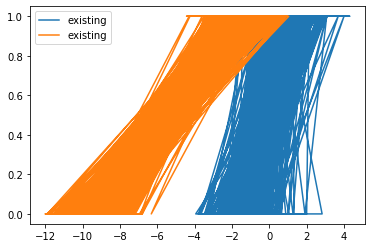

[(           nan,             nan) ( 4.2546245e+01,  1.60155400e+00)
 ( 2.3424076e+01,  5.38478180e+01) ( 3.3939110e+01,  6.77099530e+01)
 ( 1.7060816e+01, -6.17964280e+01) ( 1.8220554e+01, -6.30686150e+01)
 ( 4.1153332e+01,  2.01683310e+01) ( 4.0069099e+01,  4.50381890e+01)
 ( 1.2226079e+01, -6.90600870e+01) (-1.1202692e+01,  1.78738870e+01)
 (-7.5250973e+01, -7.13890000e-02) (-3.8416097e+01, -6.36166720e+01)
 (-1.4270972e+01, -1.70132217e+02) ( 4.7516231e+01,  1.45500720e+01)
 (-2.5274398e+01,  1.33775136e+02) ( 1.2521110e+01, -6.99683380e+01)
 ( 4.0143105e+01,  4.75769270e+01) ( 4.3915886e+01,  1.76790760e+01)
 ( 1.3193887e+01, -5.95431980e+01) ( 2.3684994e+01,  9.03563310e+01)
 ( 5.0503887e+01,  4.46993600e+00) ( 1.2238333e+01, -1.56159300e+00)
 ( 4.2733883e+01,  2.54858300e+01) ( 2.5930414e+01,  5.06377720e+01)
 (-3.3730560e+00,  2.99188860e+01) ( 9.3076900e+00,  2.31583400e+00)
 ( 3.2321384e+01, -6.47573700e+01) ( 4.5352770e+00,  1.14727669e+02)
 (-1.6290154e+01, -6.35886530e+01)

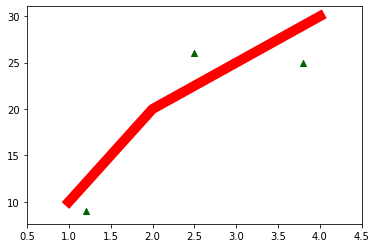

In [99]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score

X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=2)

model = LogisticRegression(solver='lbfgs')

model.fit(X, y)

yh = model.predict(X)

acc = accuracy_score(y, yh)
print(acc)

new_input = [[28.557, 77.367]]

new_output = model.predict(new_input)
print(new_input, new_output)


yh = model.predict(X)

for i in range(10):
	print(X[i], yh[i])

import matplotlib.pyplot as plt
import numpy as np


# Plot the data
plt.plot(X, yh, label='existing')

# Add a legend
plt.legend()

# Show the plot
plt.show()


import numpy as np
data1 = np.genfromtxt('D:\plot values.csv', delimiter = ",", names = ["x","y"])
print(data1)


import numpy as np
data2 = np.genfromtxt('D:\current_state.csv', delimiter = ",", names = ["x","y"])
print(data2)

import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot([1, 2, 3, 4], [10, 20, 25, 30], color='red', linewidth=10)
ax.scatter([0.3, 3.8, 1.2, 2.5], [11, 25, 9, 26], color='darkgreen', marker='^')
ax.set_xlim(0.5, 4.5)
plt.show()

In [73]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
X, y = load_iris(return_X_y=True)

model = LogisticRegression(solver='lbfgs')

clf = LogisticRegression(random_state=0).fit(X, y)
clf.predict(X[:2, :])

clf.predict_proba(X[:2, :])

clf.score(X, y)



C:\Users\sugan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sugan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.96

In [74]:
import matplotlib.pyplot as plt
import numpy as np

# Prepare the data
x = np.linspace(0, 10, 100)

# Plot the data
plt.plot(x, x, label='linear')

# Add a legend
plt.legend()

# Show the plot
plt.show()

<Figure size 640x480 with 1 Axes>